<a href="https://colab.research.google.com/github/NilarghyaDebnath/EDA/blob/main/ND_%7C_EDA_on_Global_Terrorism_Dataset_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Global Terrorism Analysis**

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Candidate Name -** Nilarghya Debnath


# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017.

The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks.

The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.



# **GitHub Link -**

https://github.com/NilarghyaDebnath

# **Problem Statement**


**Understanding and Analyzing Global Terrorism Trends through Exploratory Data Analysis**


Terrorism remains a critical global issue, affecting societies, economies, and security worldwide. This project aims to delve into a comprehensive dataset containing information on terrorist incidents across various regions, time periods, and attack types.

The primary goal is to conduct Exploratory Data Analysis (EDA) on the provided dataset to gain deeper insights into patterns, trends, and correlations within global terrorism incidents. Through rigorous analysis and visualization techniques, the project seeks to identify key trends, hotspots, and factors influencing terrorist activities.

Understanding the underlying trends and patterns in global terrorism is crucial for policymakers, security agencies, and researchers to develop effective strategies, allocate resources, and mitigate the impact of terrorist activities.

# ***Let's Begin !***

## ***1. Understanding The Data and Data Wrangling***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams



### Dataset Loading

In [4]:
# Importing the dataset
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('/content/drive/MyDrive/Global Terrorism Data.csv',encoding='latin-1')

Mounted at /content/drive


<ipython-input-4-f9e4b4357532>:4: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/Global Terrorism Data.csv',encoding='latin-1')


### Dataset First View

In [6]:
# Dataset First
pd.set_option('display.max_columns', None)
dataset.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [26]:
dataset.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,The incident occurred near the town of Balcad.,12/31/2017: Assailants opened fire on a Somali...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al-Shabaab,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,1.0,10.0,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,-9,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,The incident occurred at the Humaymim Airport.,12/31/2017: Assailants launched mortars at the...,1,1,0,1.0,1.0,Insurgency/Guerilla Action,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Muslim extremists,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mortars were used in the attack.,2.0,0.0,0.0,7.0,0.0,0.0,1,4.0,Unknown,-99.0,Seven military planes were damaged in this att...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,The incident occurred in the Datu Hoffer distr...,12/31/2017: Assailants set fire to houses in K...,1,1,1,0.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bangsamoro Islamic Freedom Movement (BIFM),NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,-99.0

### Dataset Rows & Columns count

In [27]:
# Dataset Rows & Columns
dataset.shape

(181691, 135)

### Dataset Information

In [28]:
#List of Columns
list(dataset.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [29]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [30]:
# Dataset Description
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,alternative,multiple,success,suicide,attacktype1,attacktype2,attacktype3,targtype1,targsubtype1,natlty1,targtype2,targsubtype2,natlty2,targtype3,targsubtype3,natlty3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claim2,claimmode2,claim3,claimmode3,compclaim,weaptype1,weapsubtype1,weaptype2,weapsubtype2,weaptype3,weapsubtype3,weaptype4,weapsubtype4,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,29011.000000,181690.000000,181691.000000,181691.000000,181691.000000,6314.000000,428.000000,181691.000000,171318.000000,180132.000000,11144.000000,10685.000000,10828.000000,1176.000000,1097.000000,1147.000000,181311.000000,1955.000000,320.000000,181691.000000,110576.000000,112202.000000,115571.000000,19083.000000,1890.000000,616.000000,318.000000,133.000000,4839.000000,181691.000000,160923.000000,13127.000000,11542.000000,1863.000000,1693.000000,73.000000,70.000000,171378.000000,117245.000000,114733.000000,165380.000000,116989.000000,112548.000000,181691.000000,64065.000000,3.898900e+04,181513.000000,13572.000000,13517.000000,4063.000000,8124.000000,77381.000000,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,1.292923,0.137773,0.889598,0.036507,3.247547,3.719512,5.245327,8.439719,46.971474,127.686441,10.247218,55.311652,131.179442,10.021259,55.548769,144.564952,0.081440,0.265473,0.193750,0.002950,-65.361154,-1.517727,0.049666,7.022848,0.247619,7.176948,0.411950,6.729323,-6.296342,6.447325,11.117162,6.812524,10.754029,6.911433,11.643237,6.246575,10.842857,2.403272,0.045981,0.508058,3.167668,0.038944,0.107163,-0.544556,3.295403,2.088119e+05,0.059054,4.533230,-0.353999,-46.793933,-32.516371,-0.145811,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.703729,0.344663,0.313391,0.187549,1.915772,2.272023,2.246642,6.653838,30.953357,89.299120,5.709076,25.640310,125.951485,5.723447,26.288955,163.299295,0.273511,0.441698,0.395854,0.054234,216.536633,12.830346,1.093195,2.476851,0.974018,2.783725,0.492962,2.908003,4.234620,2.173435,6.495612,2.277081,7.594574,2.177956,8.493166,1.507212,8.192672,11.545741,5.681854,4.199937,35.949392,3.057361,1.488881,3.122889,0.486912,1.552463e+07,0.461244,202.316386,6.835645,82.800405,121.209205,1.207861,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,1.000000,0.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,1.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,-9.000000,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000

#### Missing Values/Null Values

In [31]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


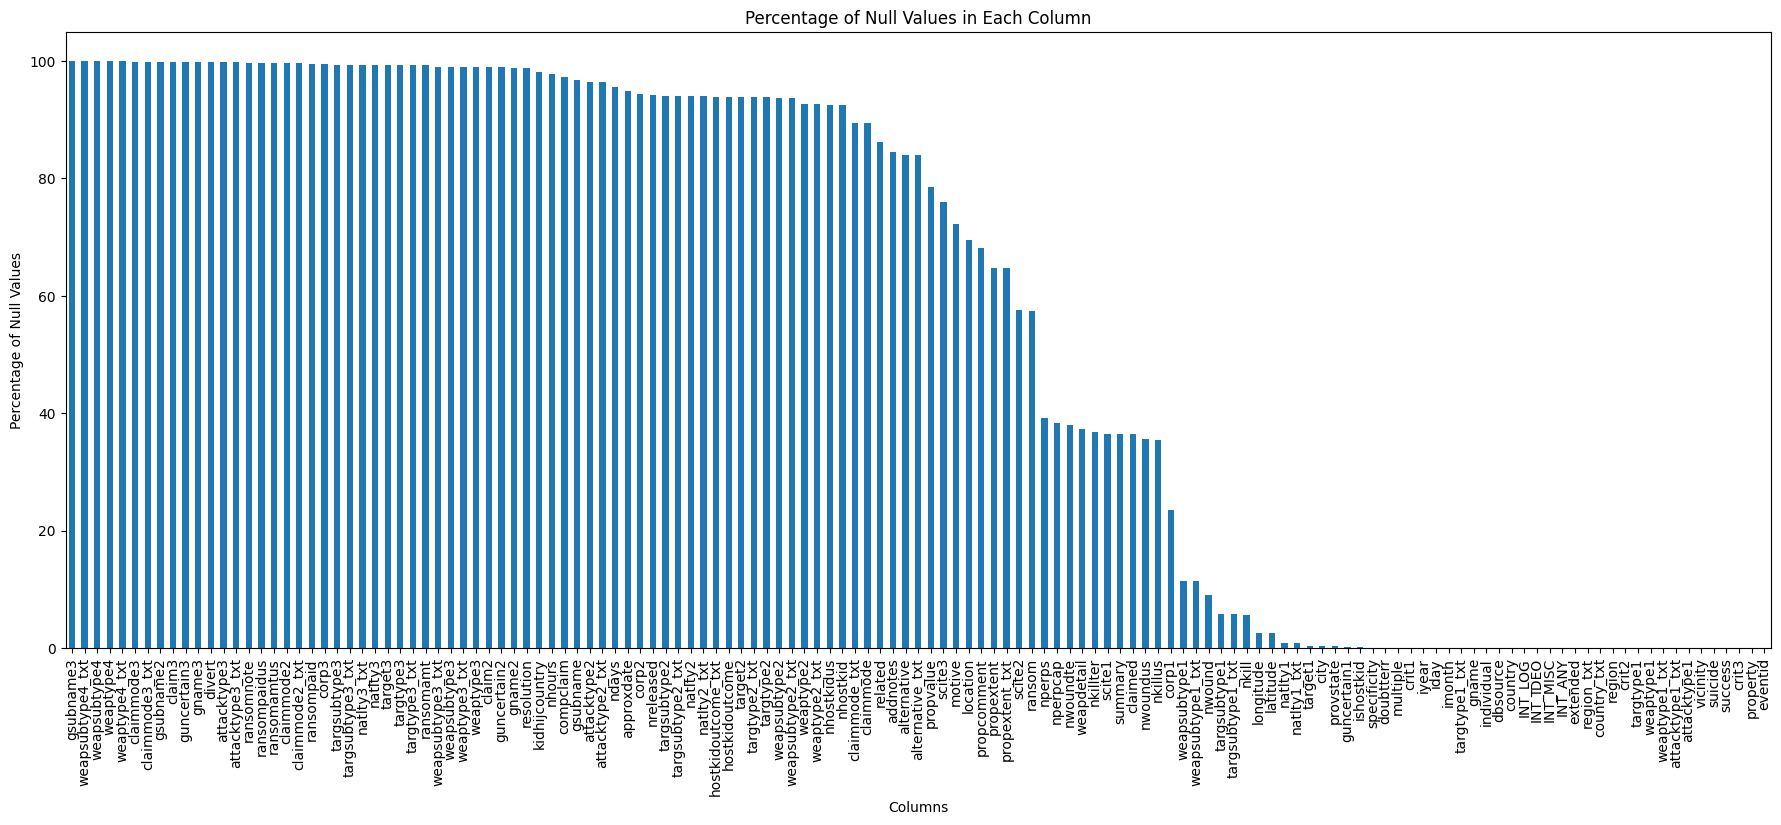

In [32]:
# Visualizing the missing values
null_counts_per_column_in_percentage = dataset.isnull().sum()/len(dataset) *100
sorted_null_counts_per_column_in_percentage = null_counts_per_column_in_percentage.sort_values(ascending=False)
plt.figure(figsize=(22, 8))
sorted_null_counts_per_column_in_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values in Each Column')
plt.show()

In [8]:
non_null_percentage_per_column = dataset.notnull().mean()
columns_to_remove = non_null_percentage_per_column[non_null_percentage_per_column <= 0.7].index
dataset_cleaned=dataset.drop(columns=columns_to_remove)
dataset_cleaned

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,5,Firearms,5.0,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,8,Incendiary,18.0,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,92.0,India,Unknown,0.0,0,6,Explosives,7.0,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [33]:
list(dataset_cleaned.columns)

['eventid',
 'Year',
 'Month',
 'Day',
 'extended',
 'country',
 'Country',
 'region',
 'Region',
 'State',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'Attack_type',
 'targtype1',
 'Target_type',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'Target',
 'natlty1',
 'natlty1_txt',
 'Group',
 'guncertain1',
 'individual',
 'weaptype1',
 'Weapon_type',
 'weapsubtype1',
 'weapsubtype1_txt',
 'Killed',
 'Wounded',
 'property',
 'ishostkid',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

#### Duplicate Values

In [34]:
# Dataset Duplicate Value Count
len(dataset_cleaned[dataset_cleaned.duplicated()])

0

<Axes: >

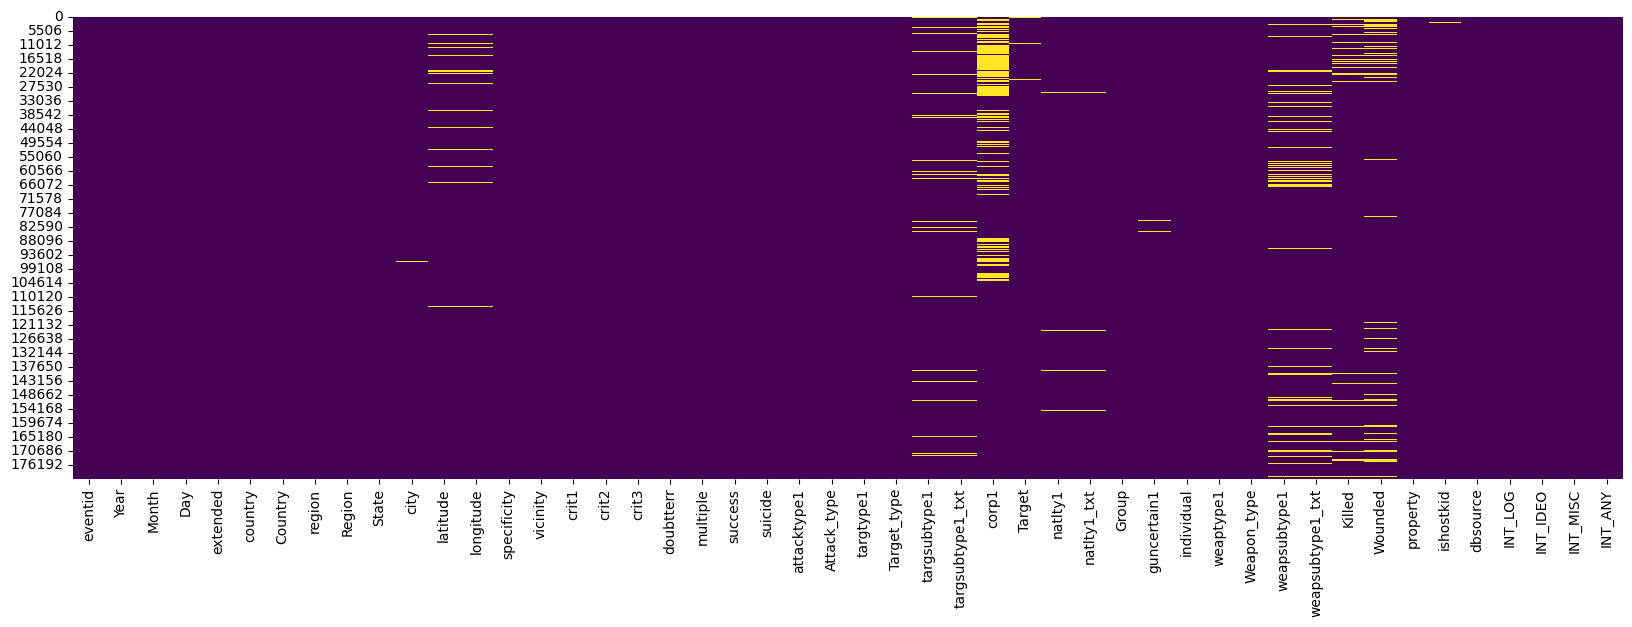

In [35]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(dataset_cleaned.isnull(), cbar=False,cmap='viridis')

In [36]:
dataset_cleaned.isnull().sum()/len(dataset_cleaned)*100

eventid              0.000000
Year                 0.000000
Month                0.000000
Day                  0.000000
extended             0.000000
country              0.000000
Country              0.000000
region               0.000000
Region               0.000000
State                0.231712
city                 0.238867
latitude             2.507554
longitude            2.508104
specificity          0.003302
vicinity             0.000000
crit1                0.000000
crit2                0.000000
crit3                0.000000
doubtterr            0.000550
multiple             0.000550
success              0.000000
suicide              0.000000
attacktype1          0.000000
Attack_type          0.000000
targtype1            0.000000
Target_type          0.000000
targsubtype1         5.709144
targsubtype1_txt     5.709144
corp1               23.418882
Target               0.350045
natlty1              0.858050
natlty1_txt          0.858050
Group                0.000000
guncertain

In [37]:
dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 48 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   Year              181691 non-null  int64  
 2   Month             181691 non-null  int64  
 3   Day               181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   Country           181691 non-null  object 
 7   region            181691 non-null  int64  
 8   Region            181691 non-null  object 
 9   State             181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [9]:
dataset_cleaned.rename(columns = {'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_type','target1':'Target','nkill':'Killed','nwound':'Wounded','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',},inplace=True)

## ***2. Exploratory Data Analysis***

In [10]:
final_df = dataset_cleaned.copy()
final_df

,eventid,Year,Month,Day,extended,country,Country,region,Region,State,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,Attack_type,targtype1,Target_type,targsubtype1,targsubtype1_txt,corp1,Target,natlty1,natlty1_txt,Group,guncertain1,individual,weaptype1,Weapon_type,weapsubtype1,weapsubtype1_txt,Killed,Wounded,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,NaN,NaN,0.0,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,NaN,NaN,1.0,0.0,0,0.0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,1,1,1,0.0,0.0,1,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,Unknown,0.0,0,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,1,1,1,-9.0,0.0,1,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,Unknown,0.0,0,8,Incendiary,NaN,NaN,NaN,NaN,1,0.0,PGIS,-9,-9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,2.0,0,1,1,0,1.0,0.0,1,0,2,Armed Assault,4,Military,36.0,Military Checkpoint,Somali National Army (SNA),Checkpoint,182.0,Somalia,Al-Shabaab,0.0,0,5,Firearms,5.0,Unknown Gun Type,1.0,2.0,-9,0.0,START Primary Collection,0,0,0,0
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,1.0,1,1,1,0,1.0,0.0,1,0,3,Bombing/Explosion,4,Military,27.0,Military Barracks/Base/Headquarters/Checkpost,Russian Air Force,Hmeymim Air Base,167.0,Russia,Muslim extremists,0.0,0,6,Explosives,11.0,"Projectile (rockets, mortars, RPGs, etc.)",2.0,7.0,1,0.0,START Primary Collection,-9,-9,1,1
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,2.0,0,1,1,1,0.0,0.0,1,0,7,Facility/Infrastructure Attack,14,Private Citizens & Property,76.0,House/Apartment/Residence,Not Applicable,Houses,160.0,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),0.0,0,8,Incendiary,18.0,Arson/Fire,0.0,0.0,1,0.0,START Primary Collection,0,0,0,0
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,Imphal,24.798346,93.940430,1.0,0,1,1,1,0.0,0.0,0,0,3,Bombing/Explosion,2,Government (General),21.0,Government Building/Facility/Office,Forest Department Manipur,Office,92.0,India,Unknown,0.0,0,6,Explosives,7.0,Grenade,0.0,0.0,-9,0.0,START Primary Collection,-9,-9,0,-9


In [11]:
numerical_features = final_df.select_dtypes(include=['number'])
numerical_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['eventid', 'Year', 'Month', 'Day', 'extended', 'country', 'region',
       'latitude', 'longitude', 'specificity', 'vicinity', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'targtype1', 'targsubtype1', 'natlty1', 'guncertain1', 'individual',
       'weaptype1', 'weapsubtype1', 'Killed', 'Wounded', 'property',
       'ishostkid', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')>

In [12]:
categorical_features = final_df.select_dtypes(include=['object'])
categorical_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Country', 'Region', 'State', 'city', 'Attack_type', 'Target_type',
       'targsubtype1_txt', 'corp1', 'Target', 'natlty1_txt', 'Group',
       'Weapon_type', 'weapsubtype1_txt', 'dbsource'],
      dtype='object')>

### Check Unique Values for each variable.

In [13]:
for i in numerical_features.columns.tolist():
  print("No. of unique values in ",i,"is",numerical_features[i].nunique(),".")

No. of unique values in  eventid is 181691 .
No. of unique values in  Year is 47 .
No. of unique values in  Month is 13 .
No. of unique values in  Day is 32 .
No. of unique values in  extended is 2 .
No. of unique values in  country is 205 .
No. of unique values in  region is 12 .
No. of unique values in  latitude is 48322 .
No. of unique values in  longitude is 48039 .
No. of unique values in  specificity is 5 .
No. of unique values in  vicinity is 3 .
No. of unique values in  crit1 is 2 .
No. of unique values in  crit2 is 2 .
No. of unique values in  crit3 is 2 .
No. of unique values in  doubtterr is 3 .
No. of unique values in  multiple is 2 .
No. of unique values in  success is 2 .
No. of unique values in  suicide is 2 .
No. of unique values in  attacktype1 is 9 .
No. of unique values in  targtype1 is 22 .
No. of unique values in  targsubtype1 is 112 .
No. of unique values in  natlty1 is 215 .
No. of unique values in  guncertain1 is 2 .
No. of unique values in  individual is 2 .
No

In [23]:
for i in categorical_features.columns.tolist():
  print("No. of unique values in ",i,"is",categorical_features[i].nunique(),".")

No. of unique values in  Country is 205 .
No. of unique values in  Region is 12 .
No. of unique values in  State is 2855 .
No. of unique values in  city is 36674 .
No. of unique values in  Attack_type is 9 .
No. of unique values in  Target_type is 22 .
No. of unique values in  targsubtype1_txt is 112 .
No. of unique values in  corp1 is 33238 .
No. of unique values in  Target is 86006 .
No. of unique values in  natlty1_txt is 215 .
No. of unique values in  Group is 3537 .
No. of unique values in  Weapon_type is 12 .
No. of unique values in  weapsubtype1_txt is 30 .
No. of unique values in  dbsource is 26 .


* The total number of innocents who were killed from 1970 to 2017 terrorist attacks are :

In [22]:
final_df['Killed'].sum()

411868.0

* To understand the numerical data behind total innocents who were killed and wounded during the attacks.

In [24]:
final_df[["Killed","Wounded"]].describe()

,Killed,Wounded
count,171378.000000,165380.000000
mean,2.403272,3.167668
std,11.545741,35.949392
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1570.000000,8191.000000


* To get an overview of region wise casualities.

In [25]:
final_df["Region"].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

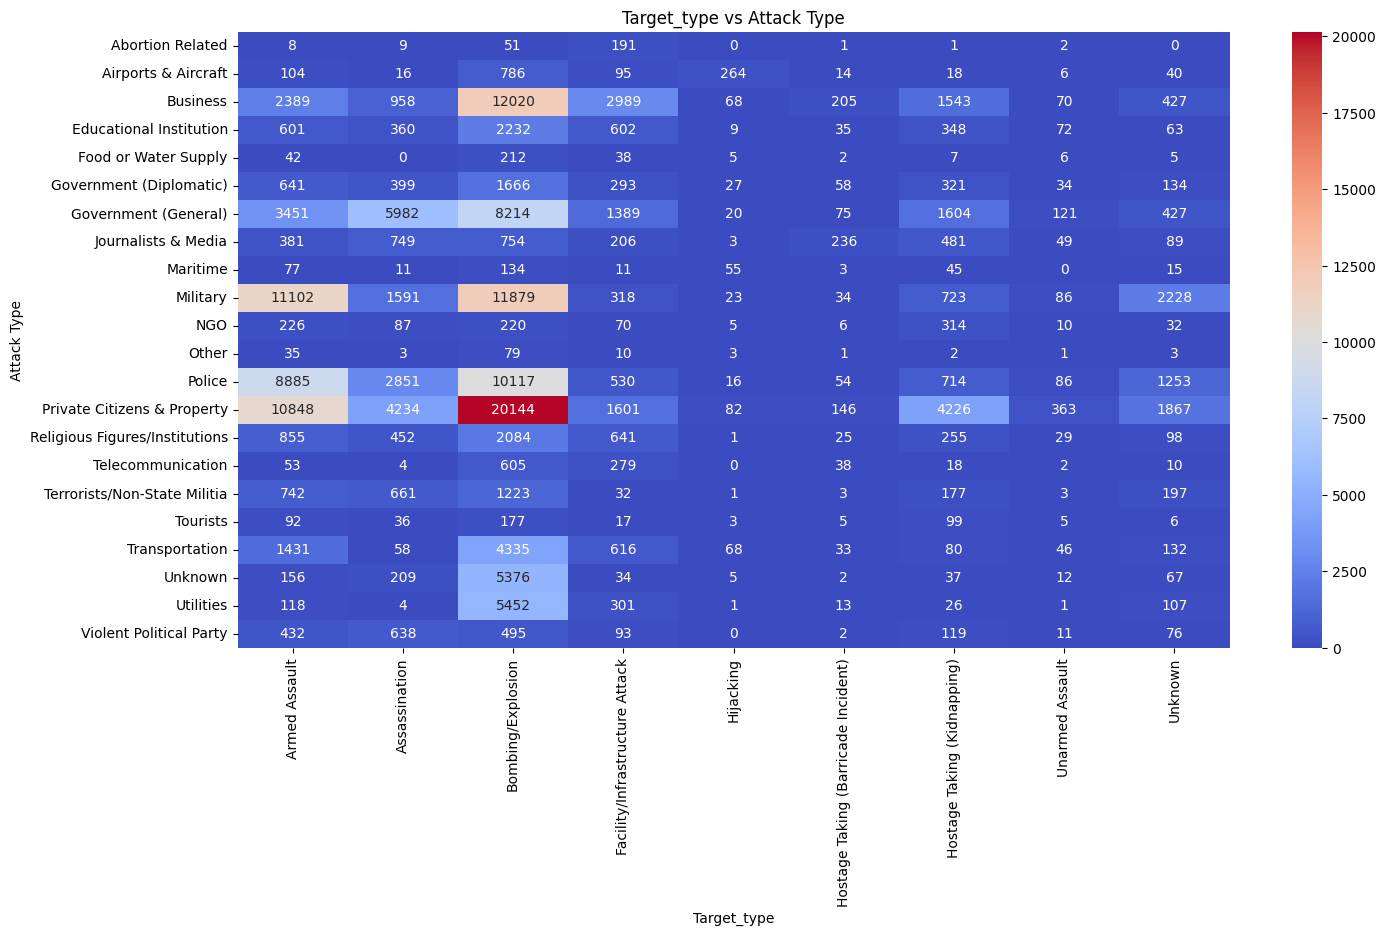

In [15]:
crosstab_result1 = pd.crosstab(final_df['Target_type'], final_df['Attack_type'])

plt.figure(figsize=(16, 8))
sns.heatmap(crosstab_result1, annot=True, cmap='coolwarm', fmt='d')
plt.title('Target_type vs Attack Type')
plt.xlabel('Target_type')
plt.ylabel('Attack Type')
plt.show()

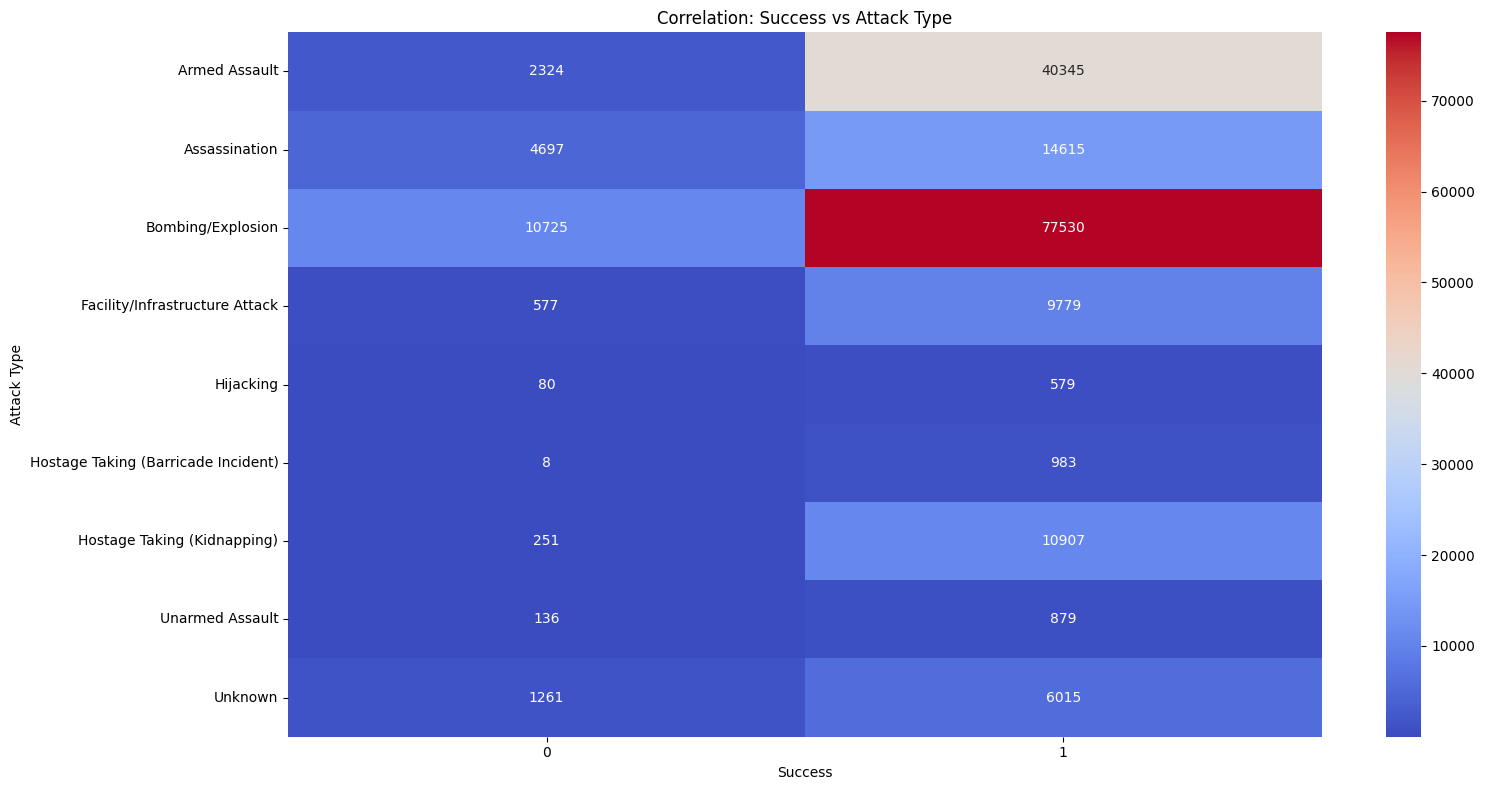

In [38]:
crosstab_result2 = pd.crosstab(final_df['Attack_type'], final_df['success'])

plt.figure(figsize=(16, 8))
sns.heatmap(crosstab_result2, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Success')
plt.ylabel('Attack Type')
plt.title('Correlation: Success vs Attack Type')
plt.tight_layout()
plt.show()

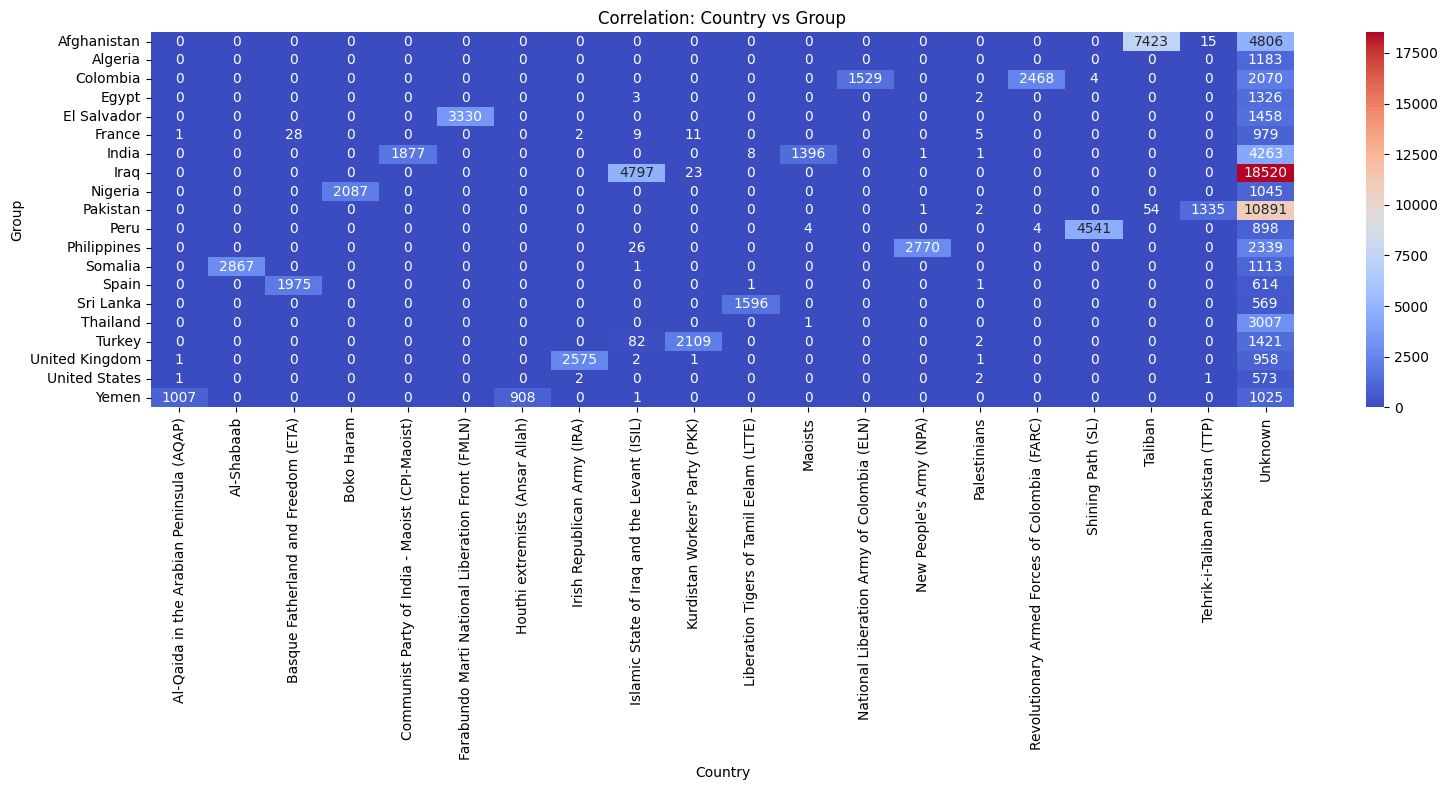

In [39]:
# Extract top 20 countries and top 20 groups
top_20_countries = final_df['Country'].value_counts().head(20).index.tolist()
top_20_groups = final_df['Group'].value_counts().head(20).index.tolist()

# Filter the DataFrame to include only data related to top 20 countries and groups
filtered_df = final_df[(final_df['Country'].isin(top_20_countries)) & (final_df['Group'].isin(top_20_groups))]

# Create crosstabulation between top 20 countries and top 20 groups
crosstab_result3 = pd.crosstab(filtered_df['Country'], filtered_df['Group'])

plt.figure(figsize=(16, 8))
sns.heatmap(crosstab_result3, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Country')
plt.ylabel('Group')
plt.title('Correlation: Country vs Group')
plt.tight_layout()
plt.show()

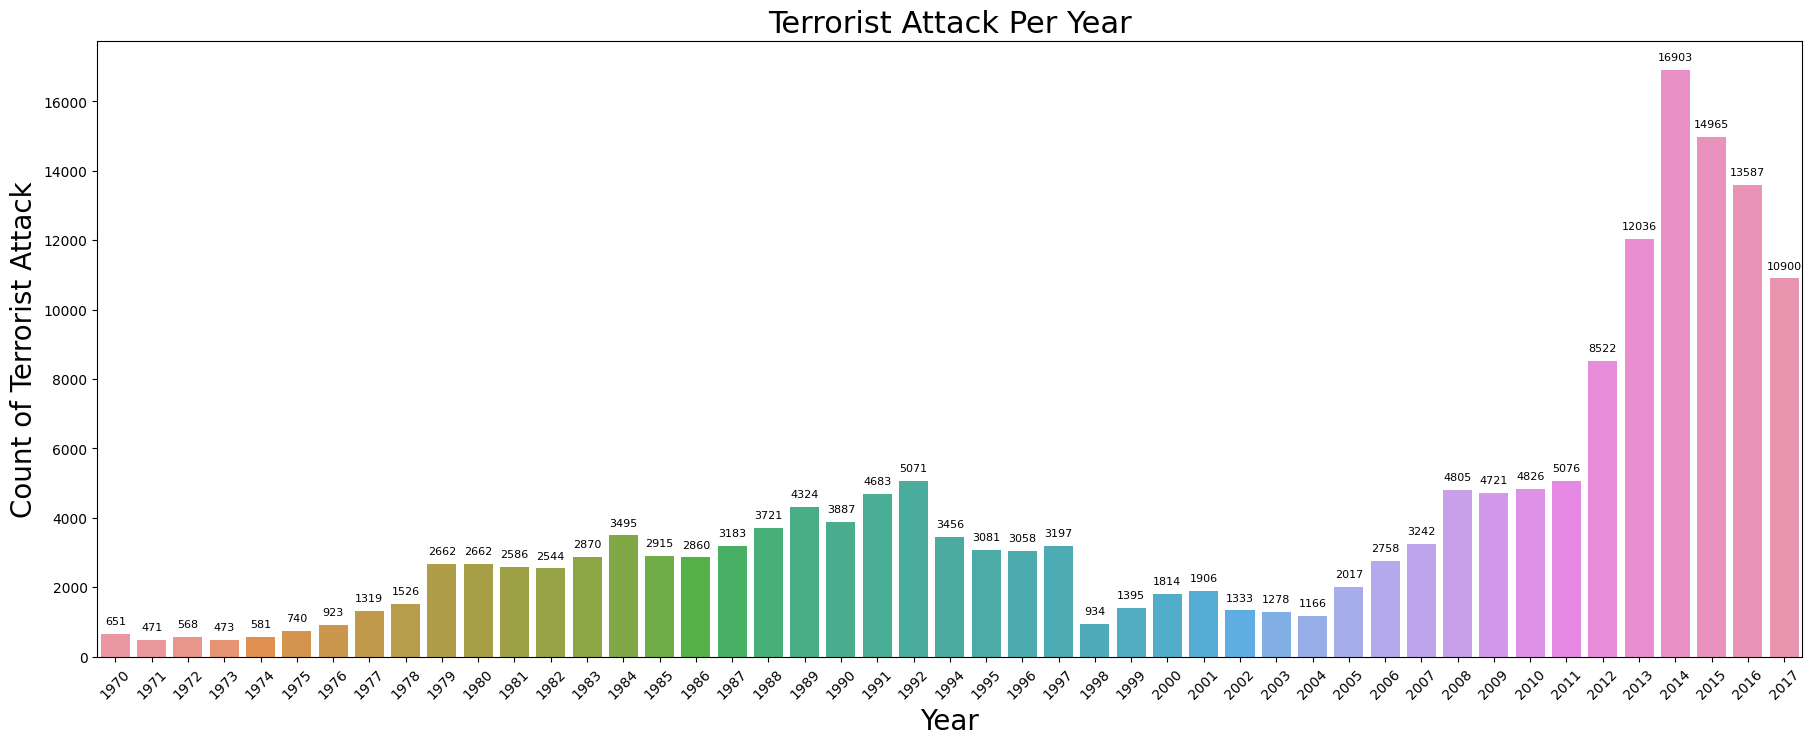

In [40]:
ax=plt.rcParams['figure.figsize'] = 22,8
ax=sns.countplot(x='Year',data=final_df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=8)
ax.set_xlabel('Year',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Terrorist Attack Per Year',fontsize=22);

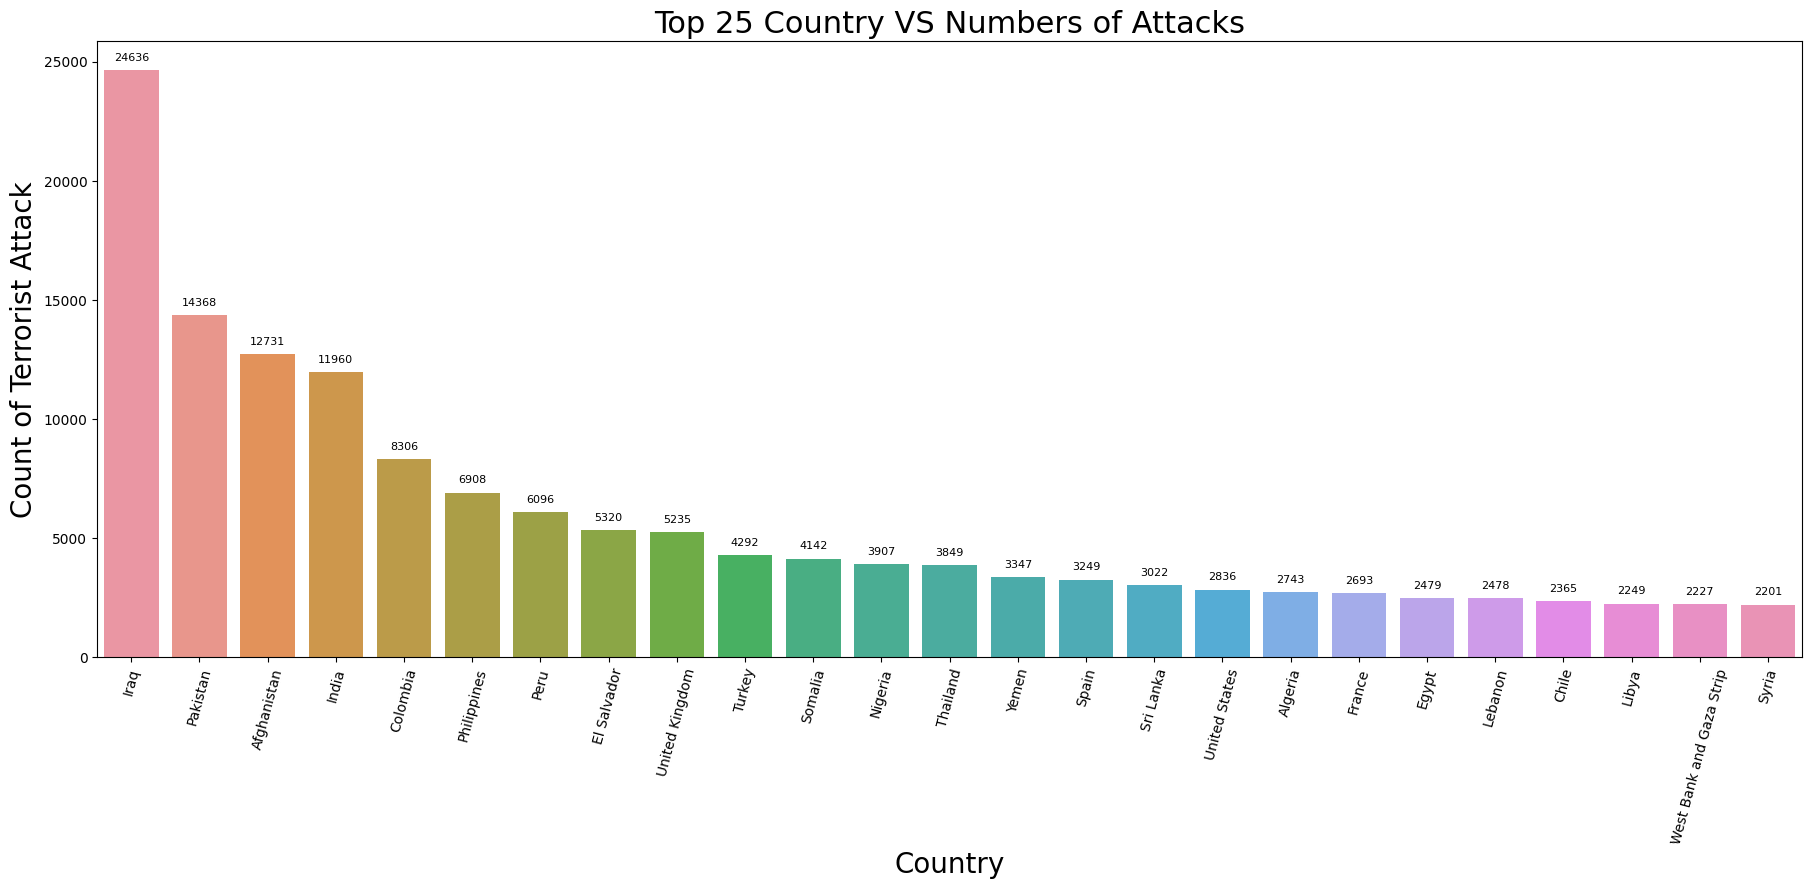

In [ ]:
ax=plt.rcParams['figure.figsize'] = 22,8
ax=sns.countplot(x='Country',data=final_df,order = final_df['Country'].value_counts().index[:25])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=8)
ax.set_xlabel('Country',fontsize=20)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Top 25 Country VS Numbers of Attacks',fontsize=22);

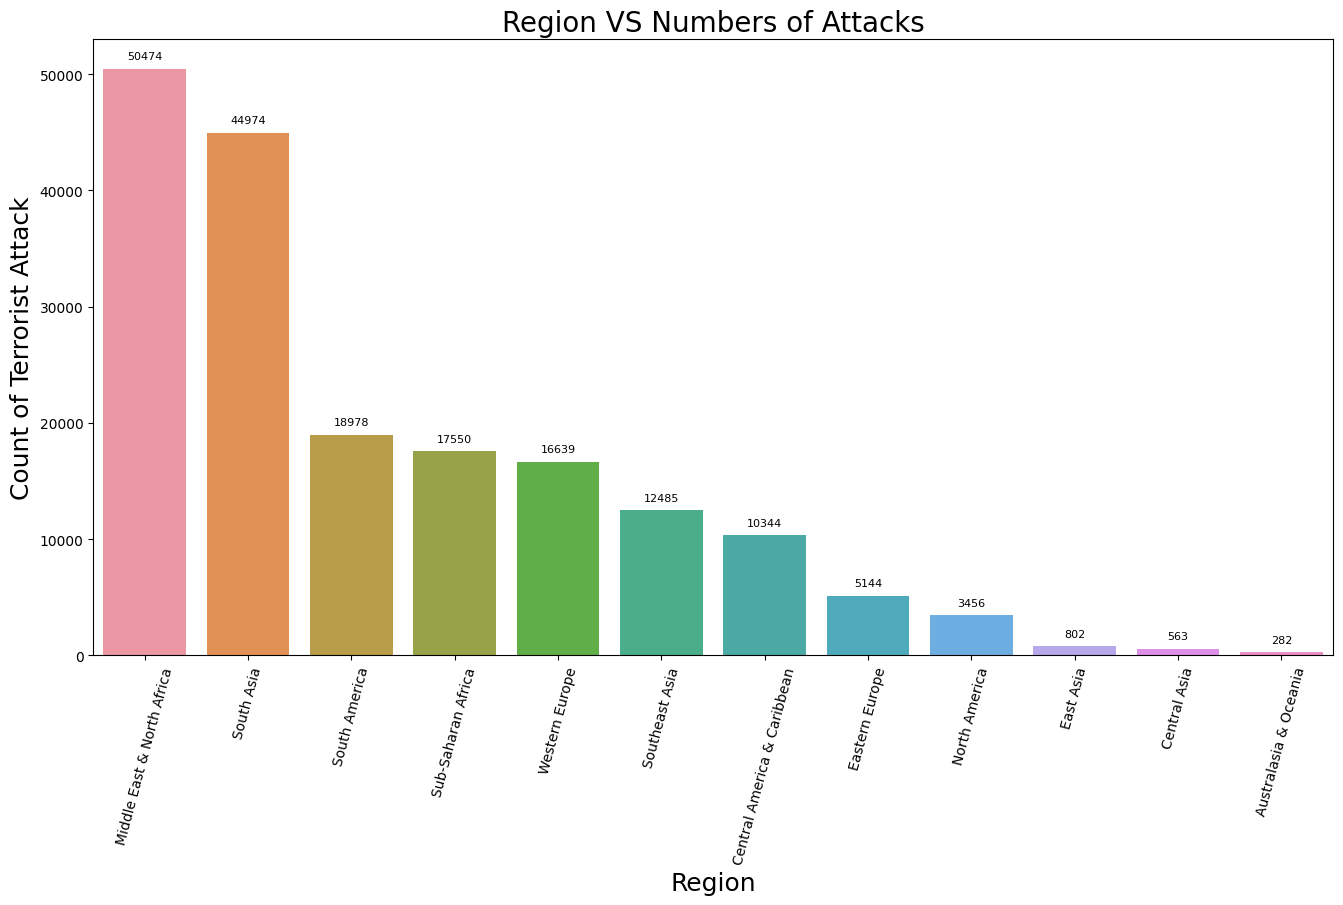

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8
ax=sns.countplot(x='Region',data=final_df,order = final_df['Region'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=8)
ax.set_xlabel('Region',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count of Terrorist Attack',fontsize=18)
ax.set_title('Region VS Numbers of Attacks',fontsize=20);

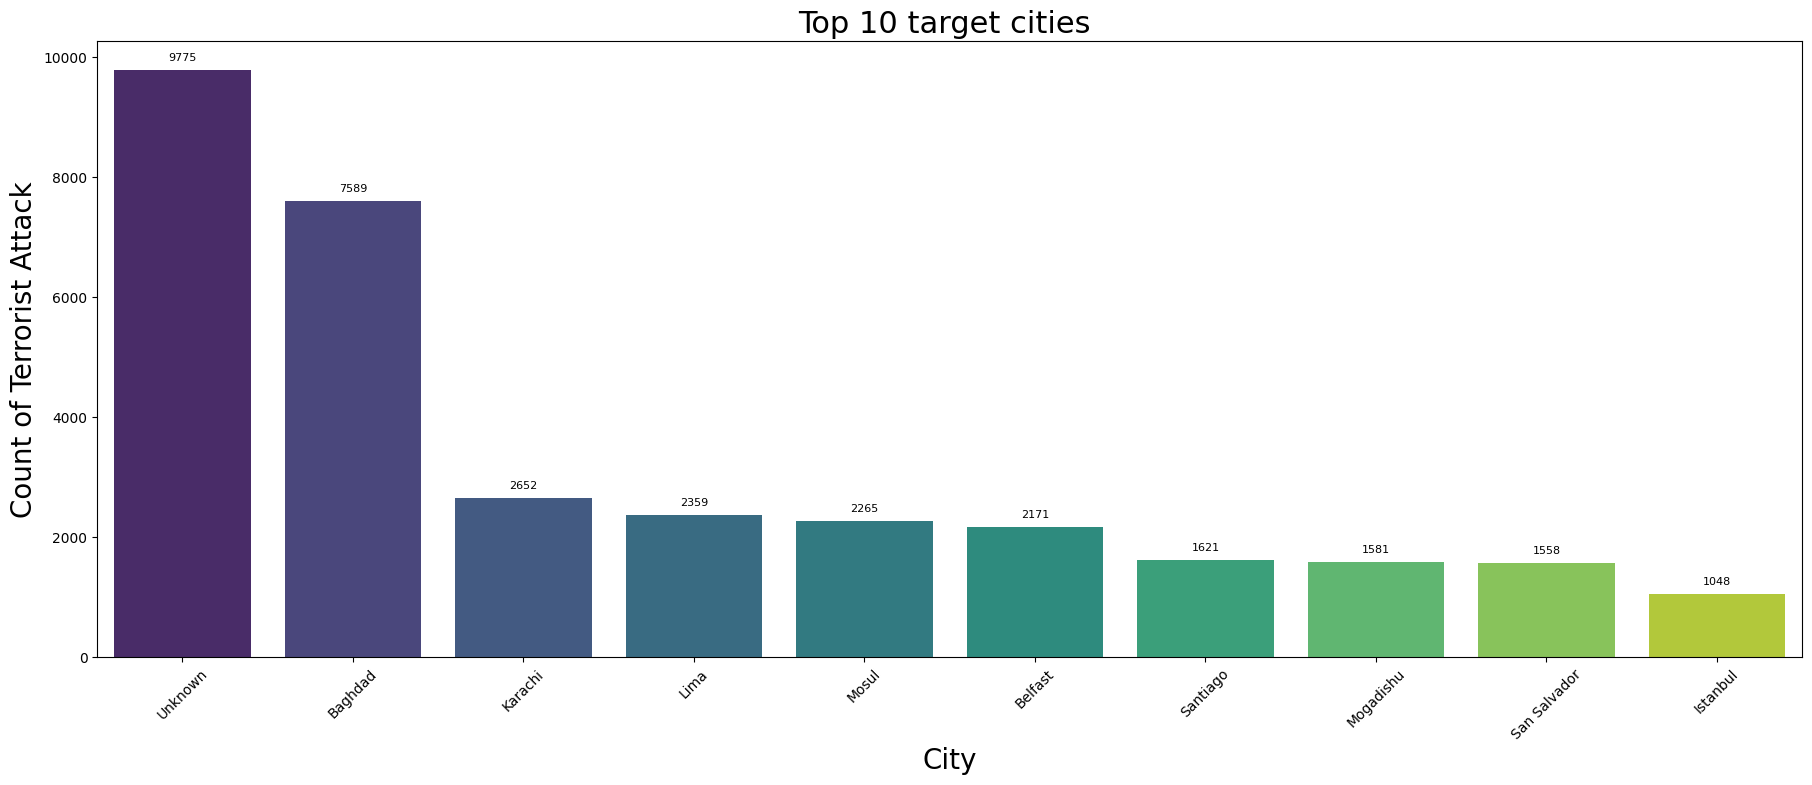

In [ ]:
top_10_cities = final_df['city'].value_counts().head(10).index.tolist()
final_df_top_10_cities = final_df[final_df['city'].isin(top_10_cities)]

ax=plt.rcParams['figure.figsize'] = 22,8
ax=sns.countplot(x='city',data=final_df_top_10_cities,order=top_10_cities, palette='viridis')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=8)
ax.set_xlabel('City',fontsize=20)
plt.xticks(rotation = 45)
ax.set_ylabel('Count of Terrorist Attack',fontsize=20)
ax.set_title('Top 10 target cities ',fontsize=22);

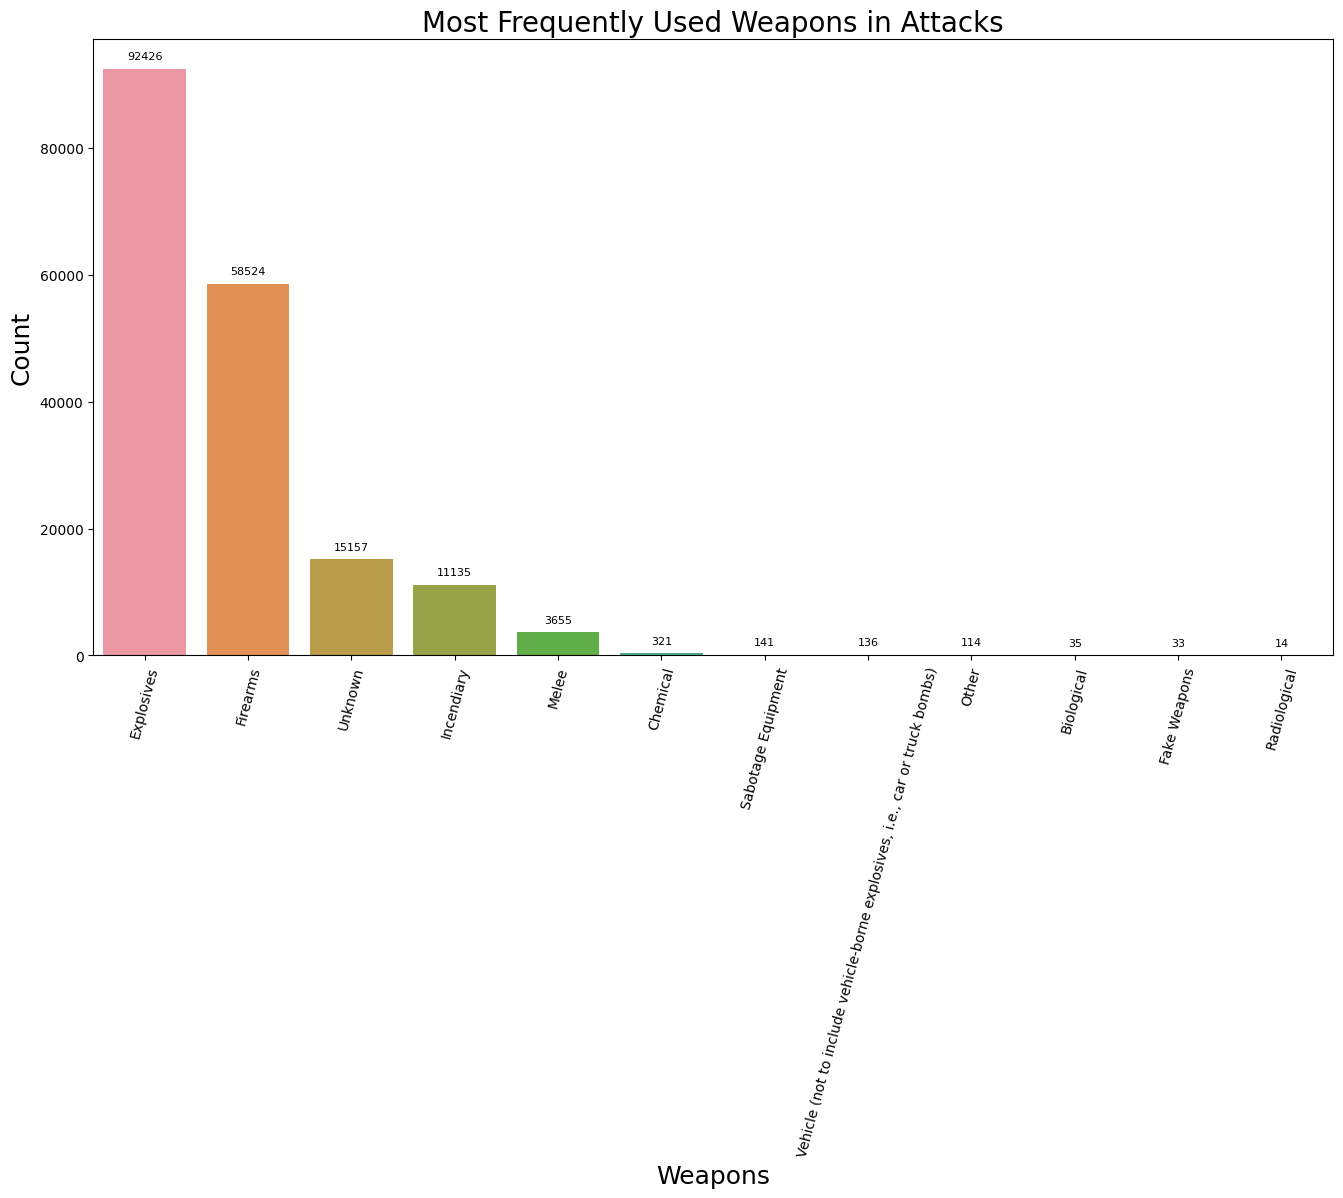

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8
ax=sns.countplot(x='Weapon_type',data=final_df,order = final_df['Weapon_type'].value_counts().index[:15])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=8)
ax.set_xlabel('Weapons',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequently Used Weapons in Attacks',fontsize=20);

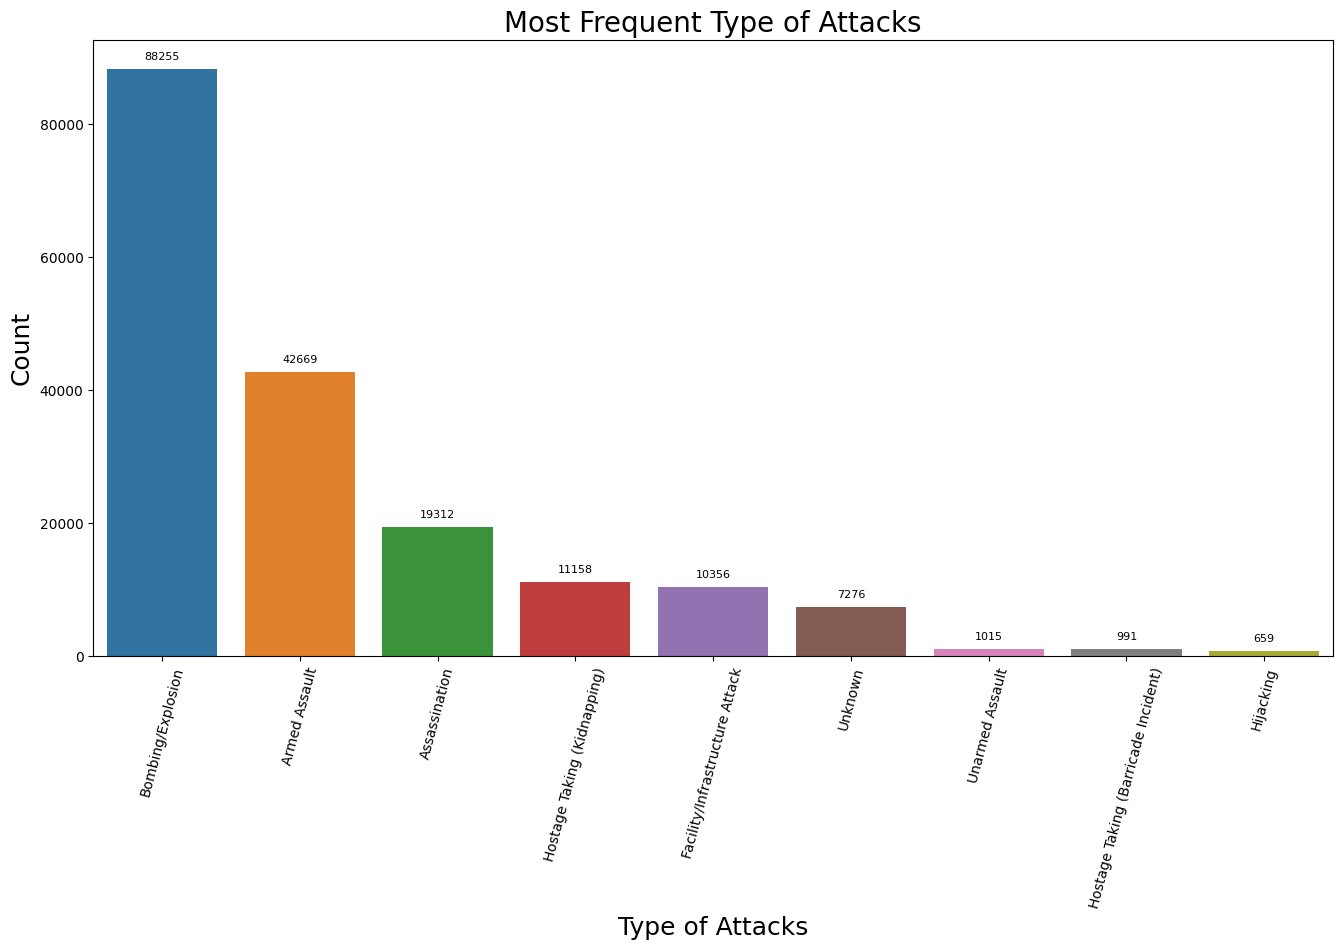

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8
ax=sns.countplot(x='Attack_type',data=final_df,order = final_df['Attack_type'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=8)
ax.set_xlabel('Type of Attacks',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Type of Attacks',fontsize=20);

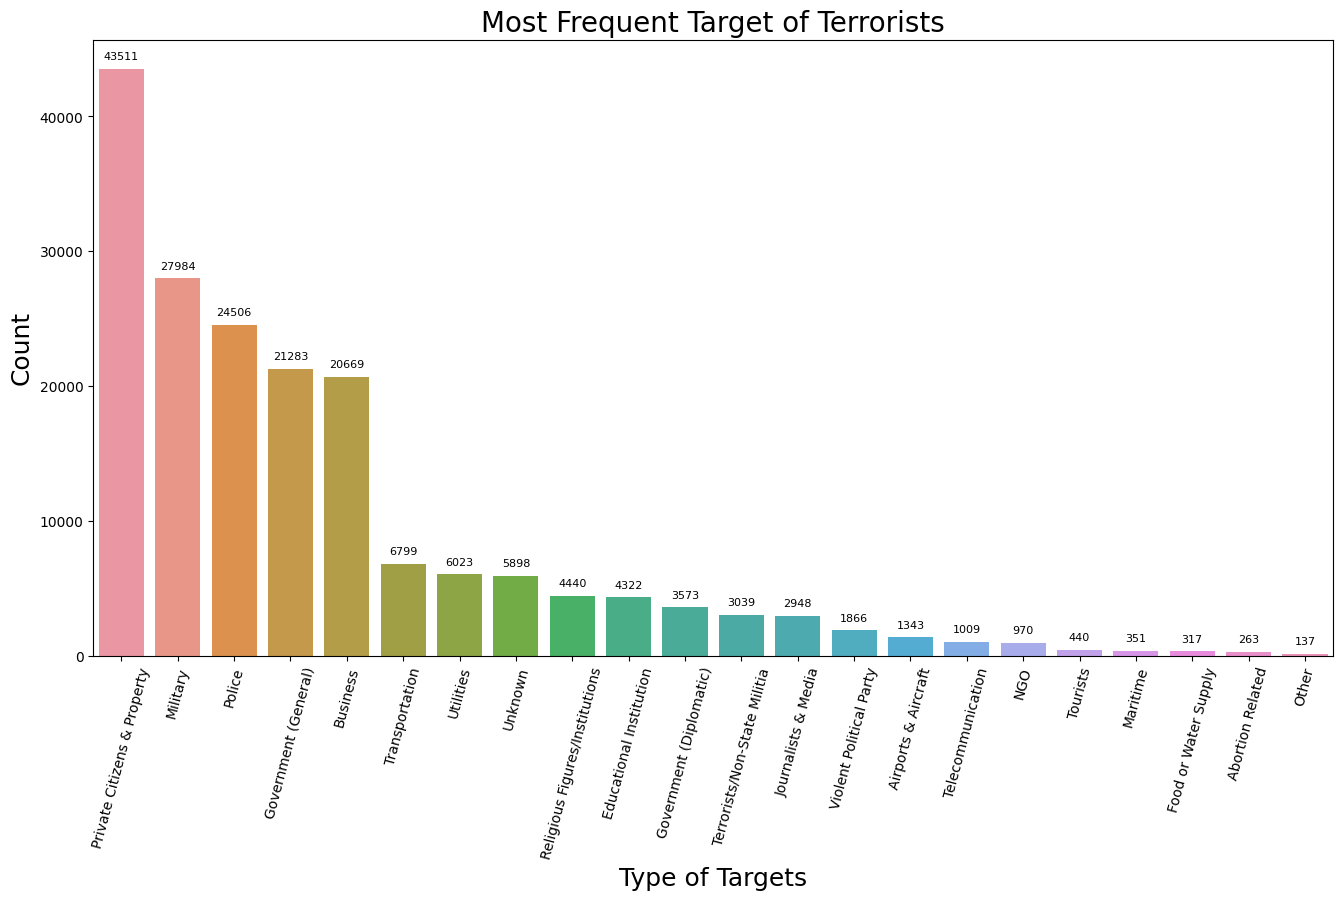

In [ ]:
ax=plt.rcParams['figure.figsize'] = 16,8
ax=sns.countplot(x='Target_type',data=final_df,order = final_df['Target_type'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=8)
ax.set_xlabel('Type of Targets',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Count',fontsize=18)
ax.set_title('Most Frequent Target of Terrorists',fontsize=20);

Text(0.5, 1.0, 'Most Active Terrorist Organizations')

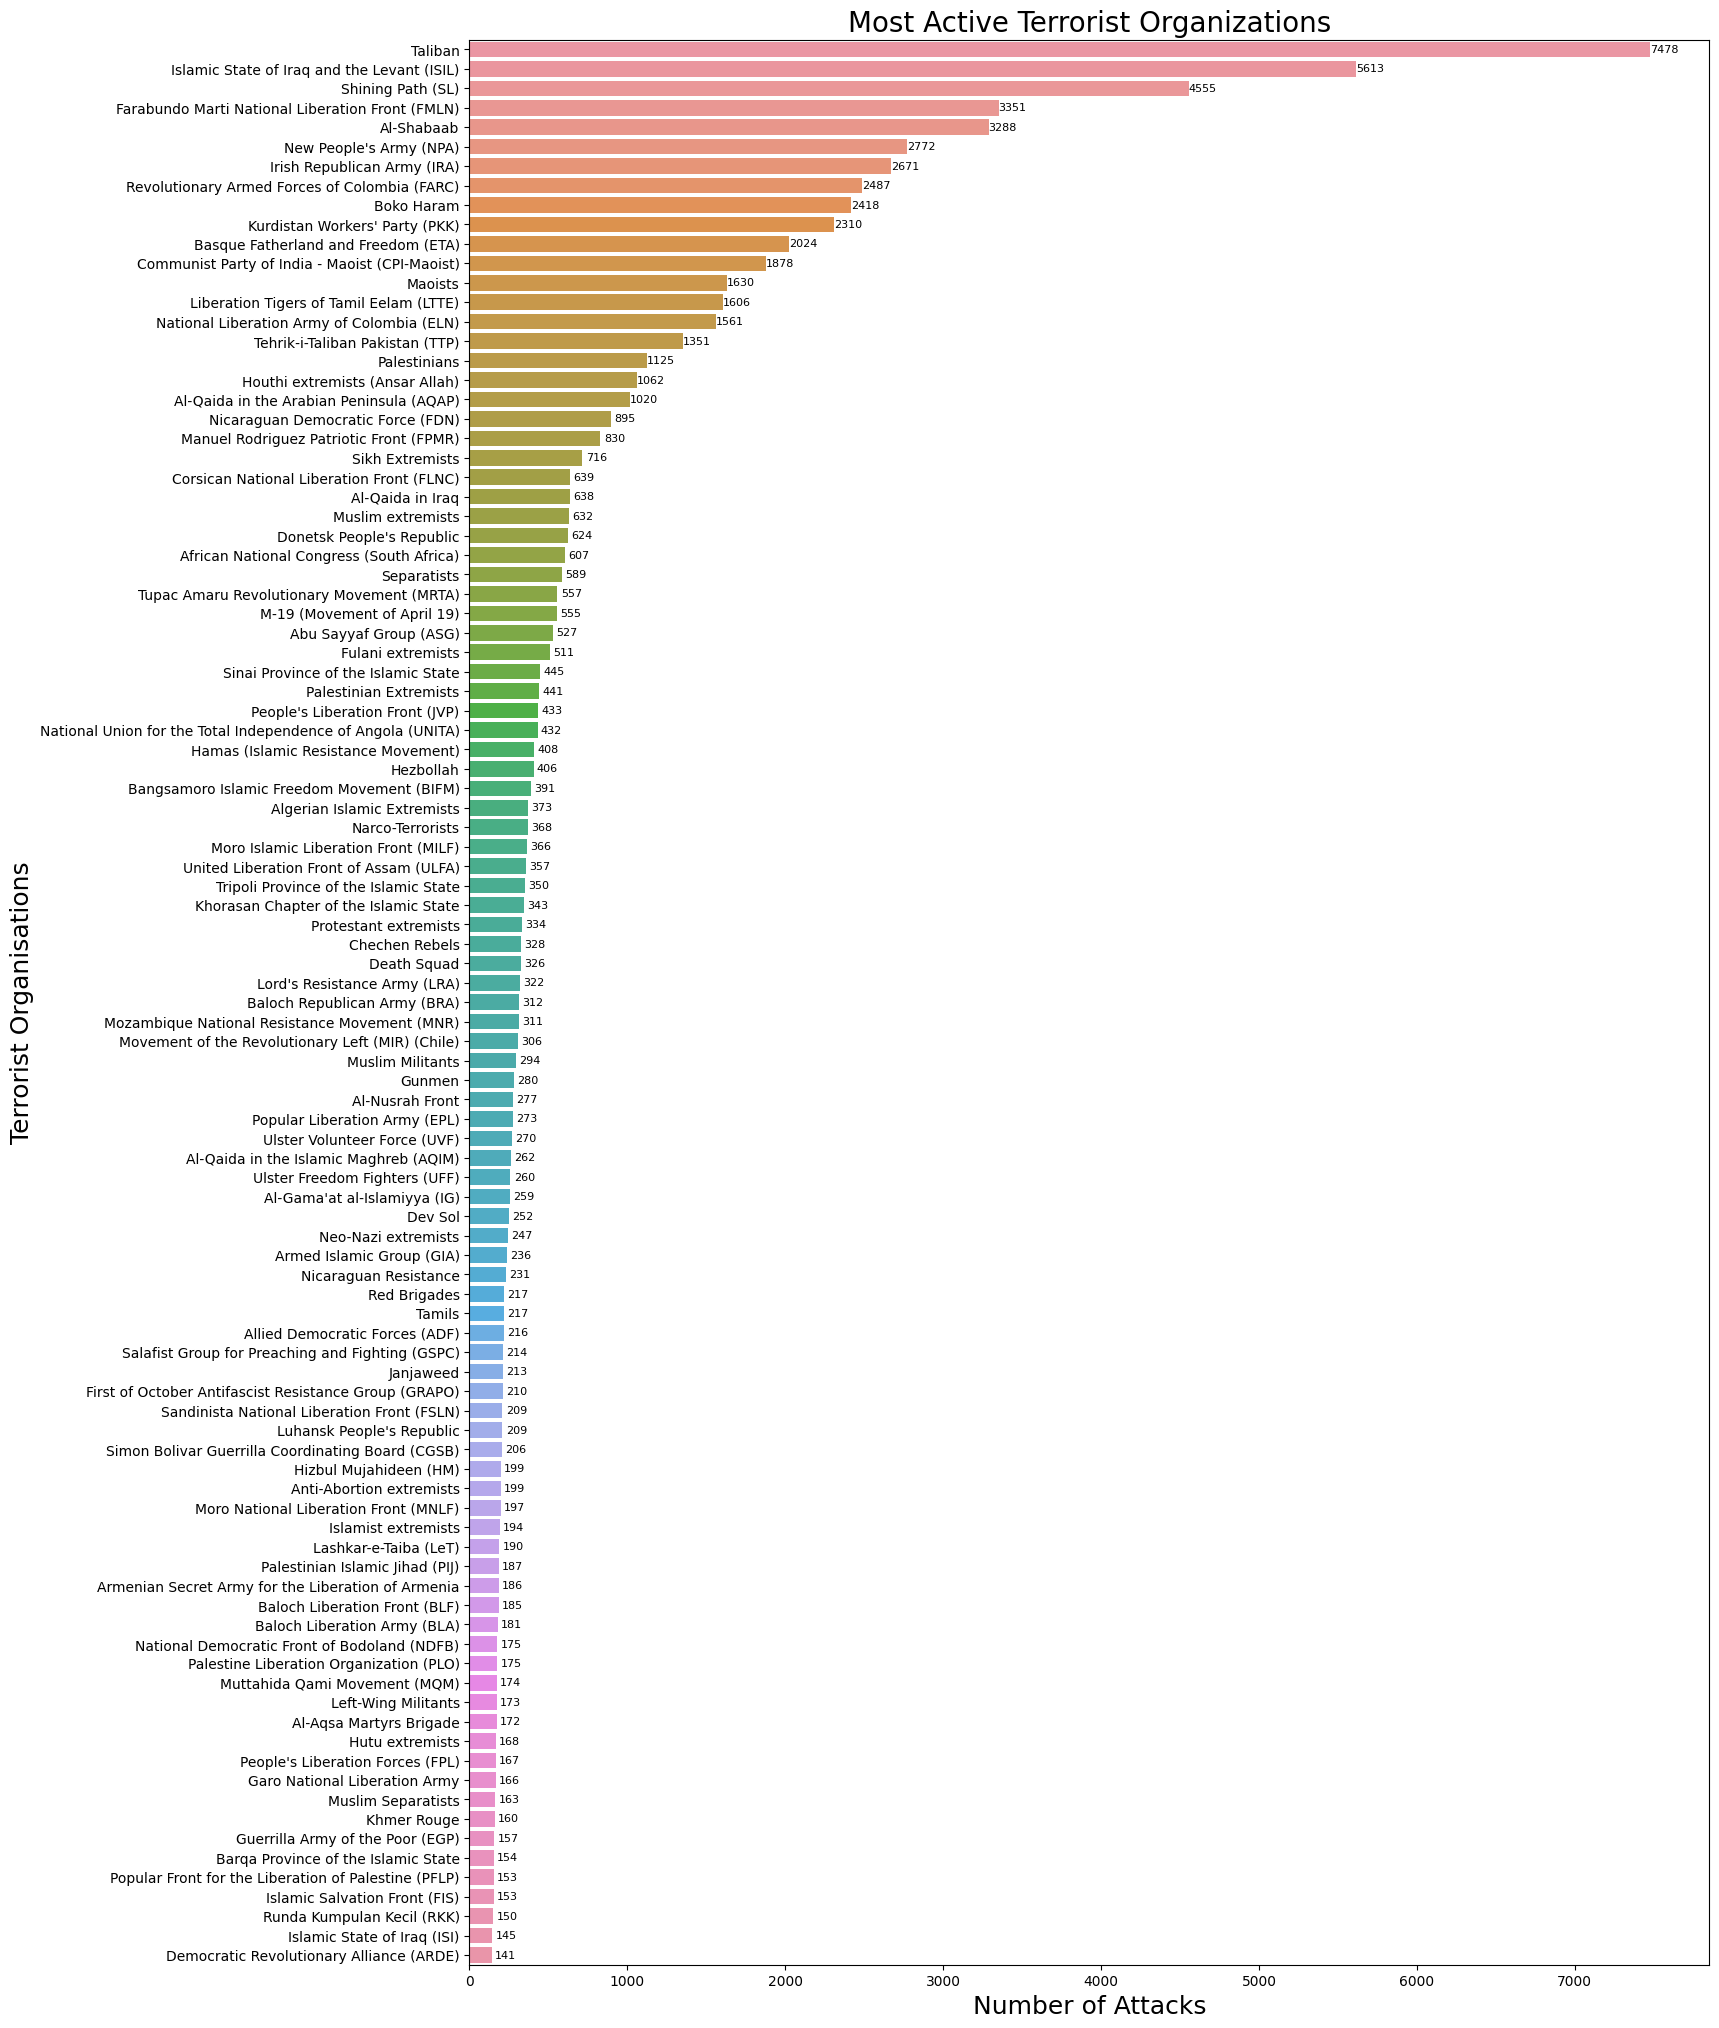

In [14]:
ax=plt.rcParams['figure.figsize'] = 16,25
ax=sns.countplot(y='Group',data=final_df,order = final_df['Group'].value_counts().index[1:100])
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center',
                xytext=(10, 0),
                textcoords='offset points',
                fontsize=8)

ax.set_xlabel('Number of Attacks',fontsize=18)
ax.set_ylabel('Terrorist Organisations',fontsize=18)
ax.set_title('Most Active Terrorist Organizations',fontsize=20)

In [ ]:
pip install folium

In [ ]:
import folium

# Create a base map centered at a specific location
world_map = folium.Map(location=[0, 0], zoom_start=2)

import folium

# Dropping rows with NaN values in latitude and longitude columns
cleaned_df = final_df.dropna(subset=['latitude', 'longitude'])

# Create a base map centered at a specific location
world_map = folium.Map(location=[0, 0], zoom_start=2)

import folium
from folium.plugins import MarkerCluster
from IPython.display import display, IFrame

# Dropping rows with NaN values in latitude and longitude columns
cleaned_df = final_df.dropna(subset=['latitude', 'longitude'])

# Create a base map centered at a specific location
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Create a MarkerCluster for better performance with many markers
marker_cluster = MarkerCluster().add_to(world_map)

# Iterate through the cleaned DataFrame
for index, row in cleaned_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Attack Type: {row['Attack_type']}<br>Success: {row['success']}"
        # Customize the popup with relevant information
    ).add_to(marker_cluster)

# Save the map to an HTML file
world_map.save("world_map.html")

# Display the map using iframe method
map_path = "world_map.html"
display(IFrame(map_path, width='100%', height='500px'))


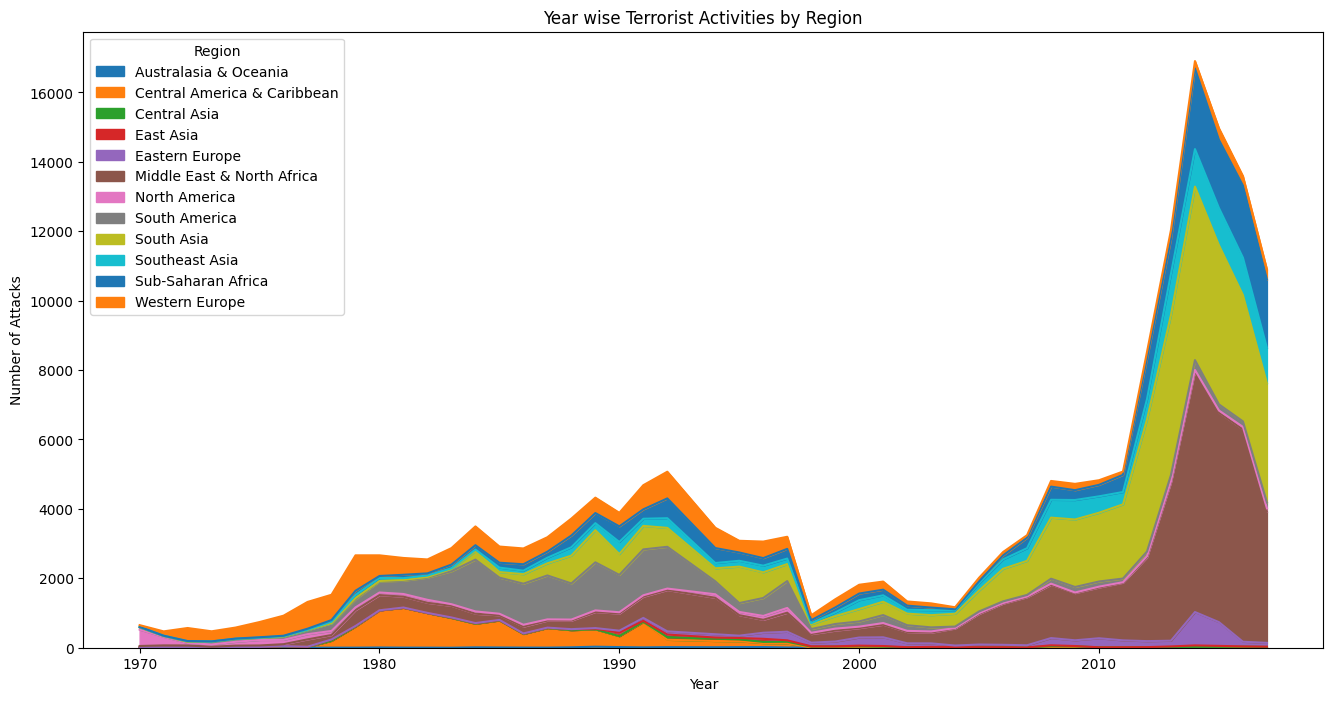

In [ ]:
pd.crosstab(final_df.Year, final_df.Region).plot(kind='area',figsize=(16,8))
plt.title('Year wise Terrorist Activities by Region')
plt.ylabel('Number of Attacks')
plt.show()

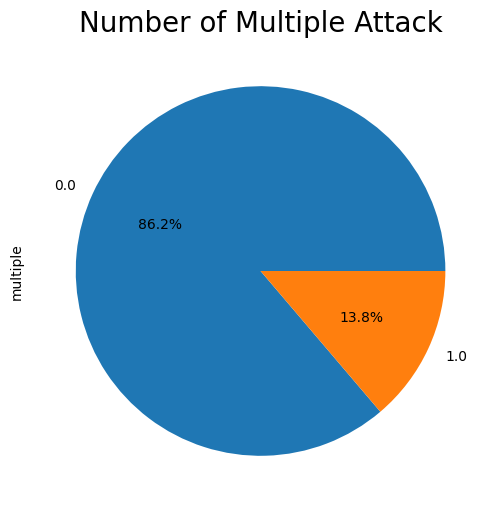

In [ ]:
plt.figure(figsize=(8, 6))
ax=final_df['multiple'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Number of Multiple Attack',fontsize=20);

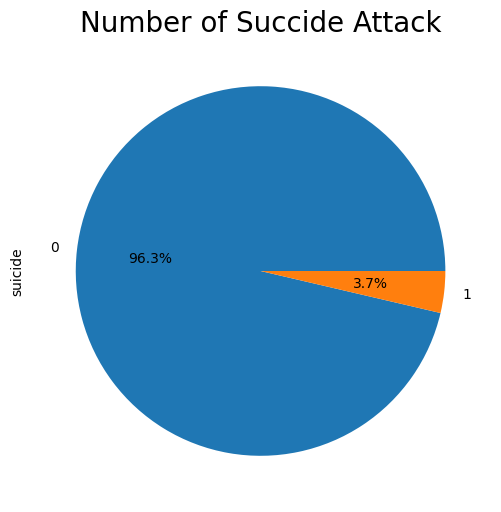

In [ ]:
plt.figure(figsize=(8, 6))
ax=final_df['suicide'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Number of Succide Attack',fontsize=20);

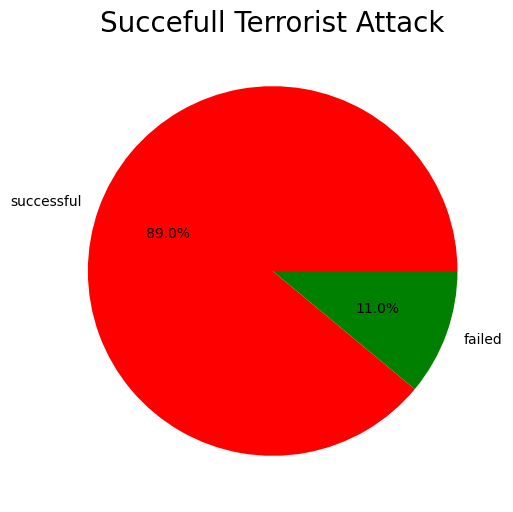

In [ ]:
plt.figure(figsize=(8, 6))
ax=final_df['success'].value_counts().plot(kind='pie',colors = ['red', 'green'],labels=['successful','failed'],autopct='%1.1f%%')
ax.set_title('Succefull Terrorist Attack',fontsize=20)
plt.axis('off');

In [ ]:
country_successful=final_df.groupby('Country').agg({'eventid':'count','success':'sum'}).reset_index()
country_successful.columns=['Country','Total_Attacks','Attack_Success']
country_successful['Attack_Failed']=country_successful['Total_Attacks']-country_successful['Attack_Success']
country_successful['Failure_Attack_Rate']=(country_successful['Attack_Failed']/country_successful['Total_Attacks'])*100
country_successful['Successful_Attack_Rate']=(country_successful['Attack_Success']/country_successful['Total_Attacks'])*100
country_successful

,Country,Total_Attacks,Attack_Success,Attack_Failed,Failure_Attack_Rate,Successful_Attack_Rate
0,Afghanistan,12731,11141,1590,12.489200,87.510800
1,Albania,80,64,16,20.000000,80.000000
2,Algeria,2743,2561,182,6.635071,93.364929
3,Andorra,1,1,0,0.000000,100.000000
4,Angola,499,486,13,2.605210,97.394790
...,...,...,...,...,...,...
200,Yemen,3347,2837,510,15.237526,84.762474
201,Yugoslavia,203,179,24,11.822660,88.177340
202,Zaire,50,45,5,10.000000,90.000000
203,Zambia,62,58,4,6.451613,93.548387


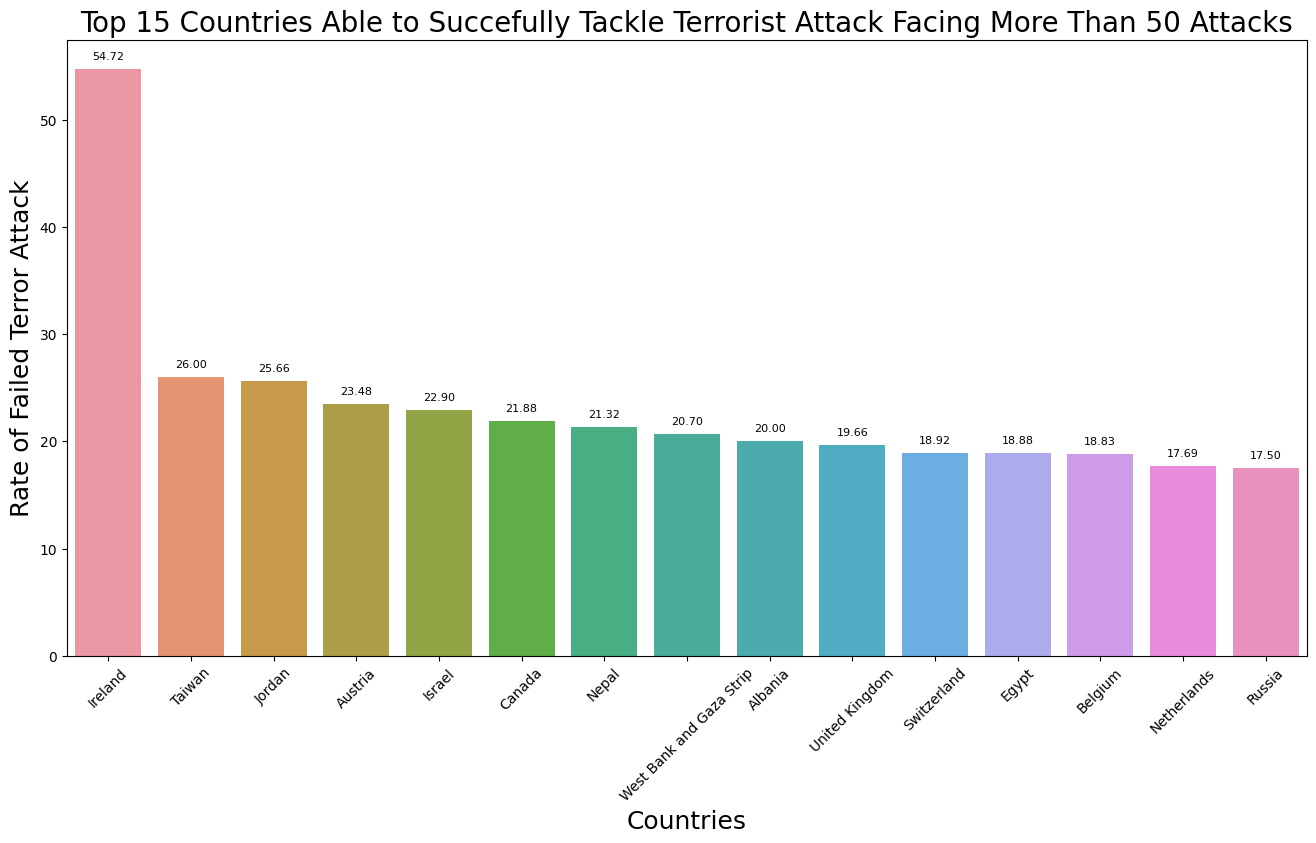

In [ ]:
able_stop_terror_attack=country_successful[country_successful['Total_Attacks']>=50].sort_values('Failure_Attack_Rate',ascending=False )[:15]
plot_able_stop_terror_attack=able_stop_terror_attack.loc[:,['Country','Failure_Attack_Rate']]
ax=plt.rcParams['figure.figsize'] = 16,8
ax=sns.barplot(x='Country',y='Failure_Attack_Rate',data=plot_able_stop_terror_attack)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=8)

ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 45)
ax.set_ylabel('Rate of Failed Terror Attack',fontsize=18)
ax.set_title('Top 15 Countries Able to Succefully Tackle Terrorist Attack Facing More Than 50 Attacks',fontsize=20);

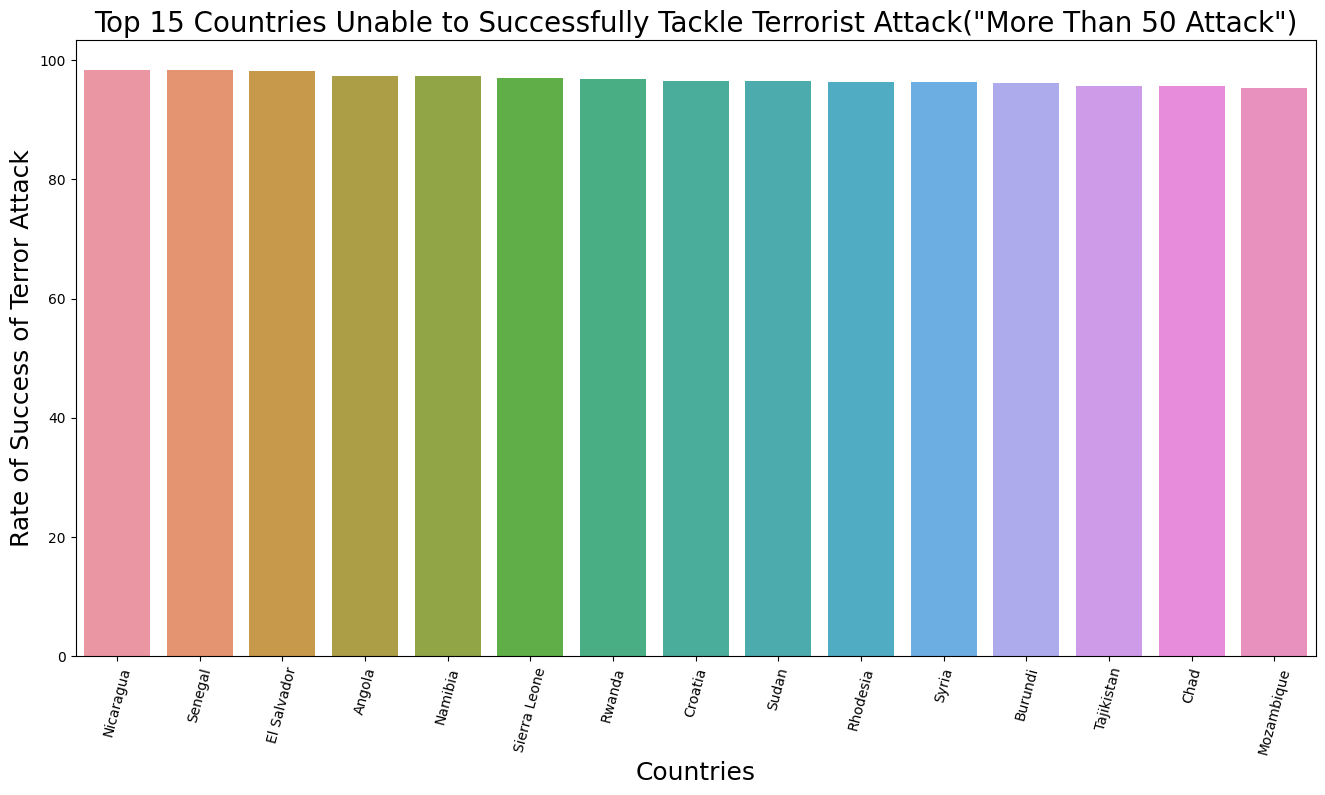

In [ ]:
unable_stop_terror_attack=country_successful[country_successful['Total_Attacks']>=50].sort_values('Successful_Attack_Rate',ascending=False )[:15]
plot_unable_stop_terror_attack=unable_stop_terror_attack.loc[:,['Country','Successful_Attack_Rate','Total_Attacks']]
ax=plt.rcParams['figure.figsize'] = 16,8
ax=sns.barplot(x='Country',y='Successful_Attack_Rate',data=plot_unable_stop_terror_attack)
ax.set_xlabel('Countries',fontsize=18)
plt.xticks(rotation = 75)
ax.set_ylabel('Rate of Success of Terror Attack',fontsize=18)
ax.set_title('Top 15 Countries Unable to Successfully Tackle Terrorist Attack("More Than 50 Attack")',fontsize=20);

In [17]:
attack_per_year=final_df.groupby(['Year','Region','Target_type','Target','success','Weapon_type','Attack_type','Group','suicide'])['eventid'].count().to_frame(name = 'Total_Attacks').reset_index()
attack_per_year

,Year,Region,Target_type,Target,success,Weapon_type,Attack_type,Group,suicide,Total_Attacks
0,1970,Australasia & Oceania,Government (Diplomatic),Yugoslav Consulate,1,Explosives,Bombing/Explosion,Croatian Nationalists,0,1
1,1970,Central America & Caribbean,Business,"Maria Estraoa Zamora, 12 year old daughter",1,Unknown,Hostage Taking (Kidnapping),Sandinista National Liberation Front (FSLN),0,1
2,1970,Central America & Caribbean,Business,businessman,1,Unknown,Hostage Taking (Kidnapping),Rebel Armed Forces of Guatemala (FAR),0,1
3,1970,Central America & Caribbean,Government (Diplomatic),"Bodyguard, British Consul",1,Unknown,Assassination,Unknown,0,1
4,1970,Central America & Caribbean,Government (Diplomatic),"Count Karl Von Spreti, ambassador to Guatemala",1,Unknown,Hostage Taking (Kidnapping),Rebel Armed Forces of Guatemala (FAR),0,1
...,...,...,...,...,...,...,...,...,...,...
129508,2017,Western Europe,Unknown,Unknown,0,Explosives,Bombing/Explosion,Ulster Freedom Fighters (UFF),0,1
129509,2017,Western Europe,Unknown,Unknown,0,Explosives,Bombing/Explosion,Unknown,0,22
129510,2017,Western Europe,Unknown,Unknown,1,Explosives,Bombing/Explosion,The New Irish Republican Army,0,1
129511,2017,Western Europe,Utilities,Distributor,1,Incendiary,Facility/Infrastructure Attack,Wild Individualities,0,1


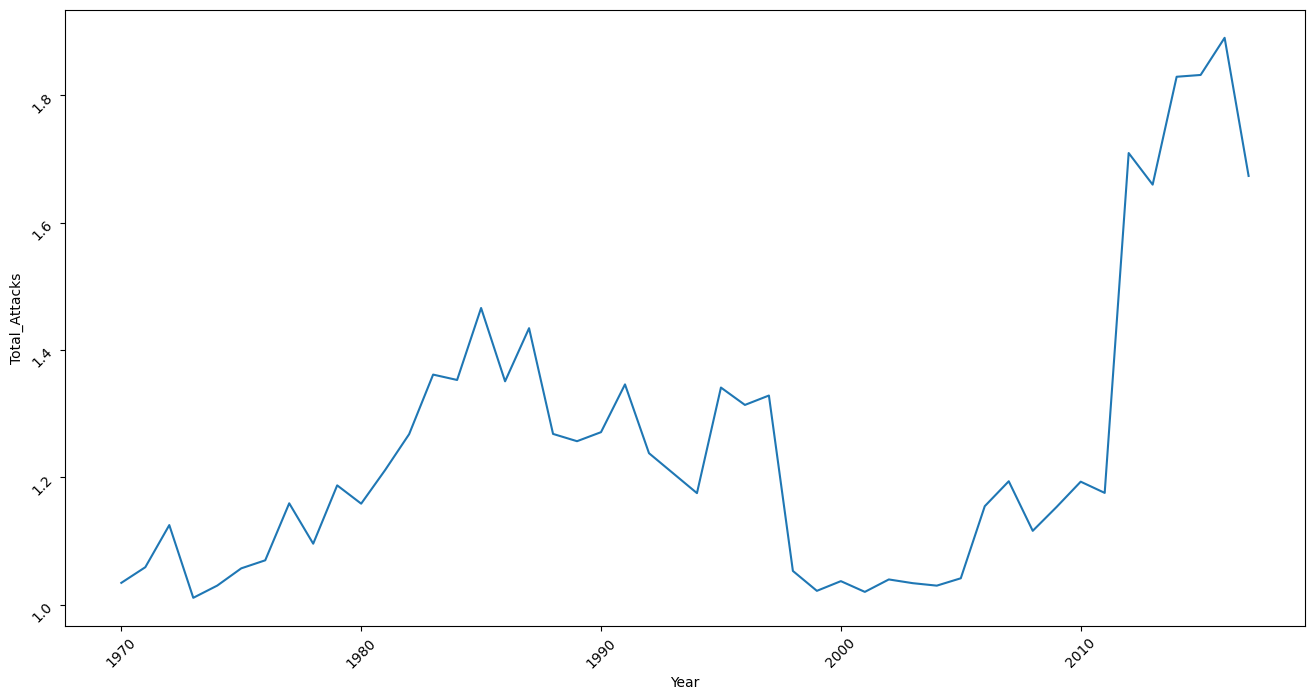

In [21]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x="Year", y="Total_Attacks", errorbar=None, data=attack_per_year)
ax.tick_params(rotation=45)

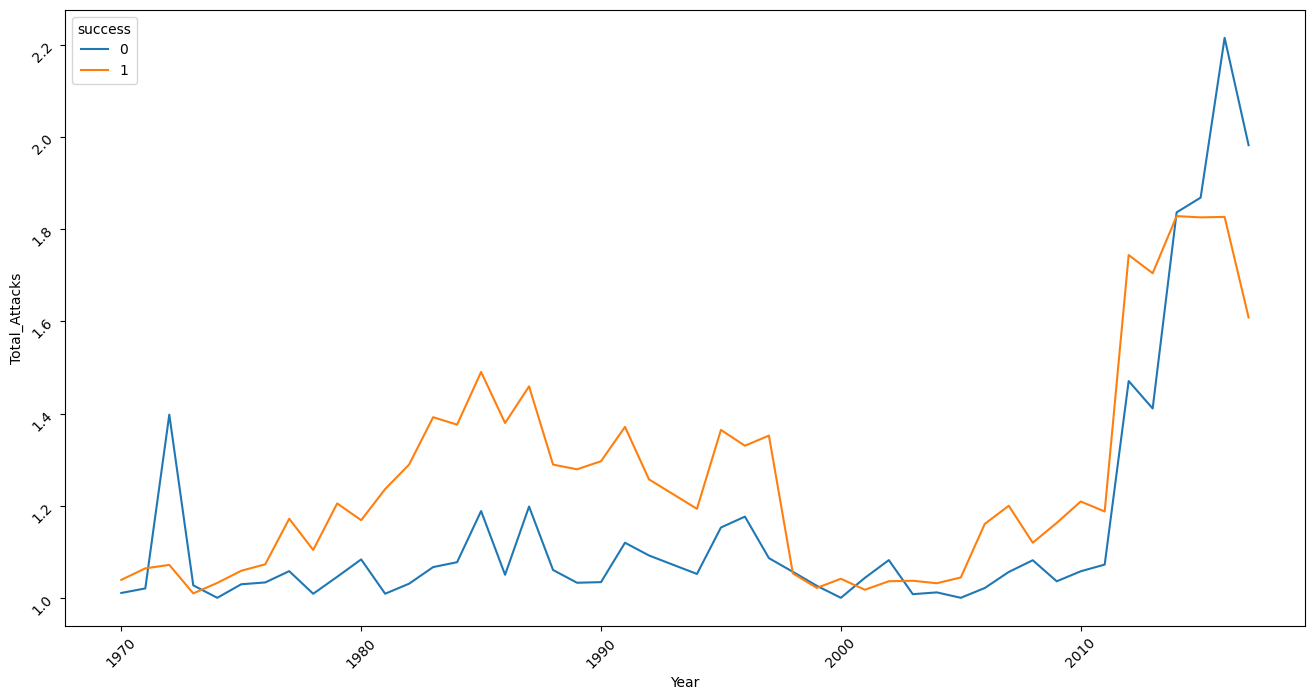

In [29]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x="Year", y="Total_Attacks", hue='success', errorbar=None ,data=attack_per_year)
ax.tick_params(rotation=45)

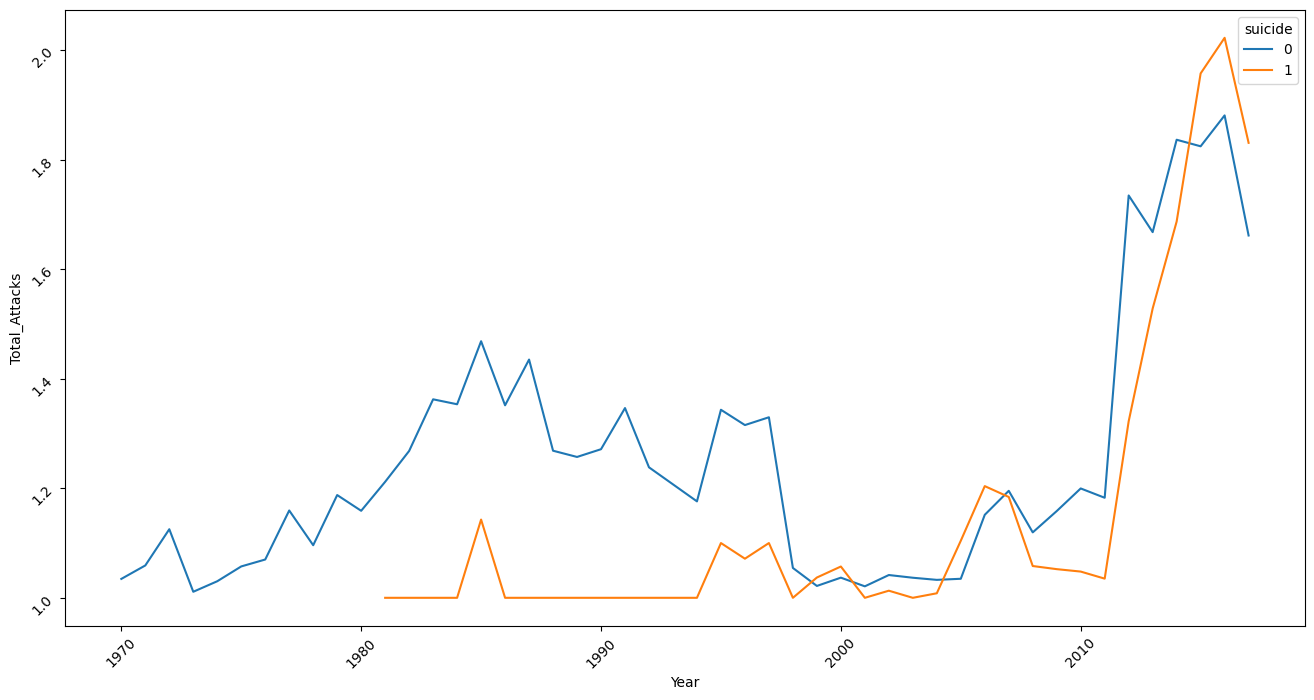

In [18]:
plt.figure(figsize=(16, 8))
ax = sns.lineplot(x="Year", y="Total_Attacks", hue='suicide', errorbar=None ,data=attack_per_year)
ax.tick_params(rotation=45)

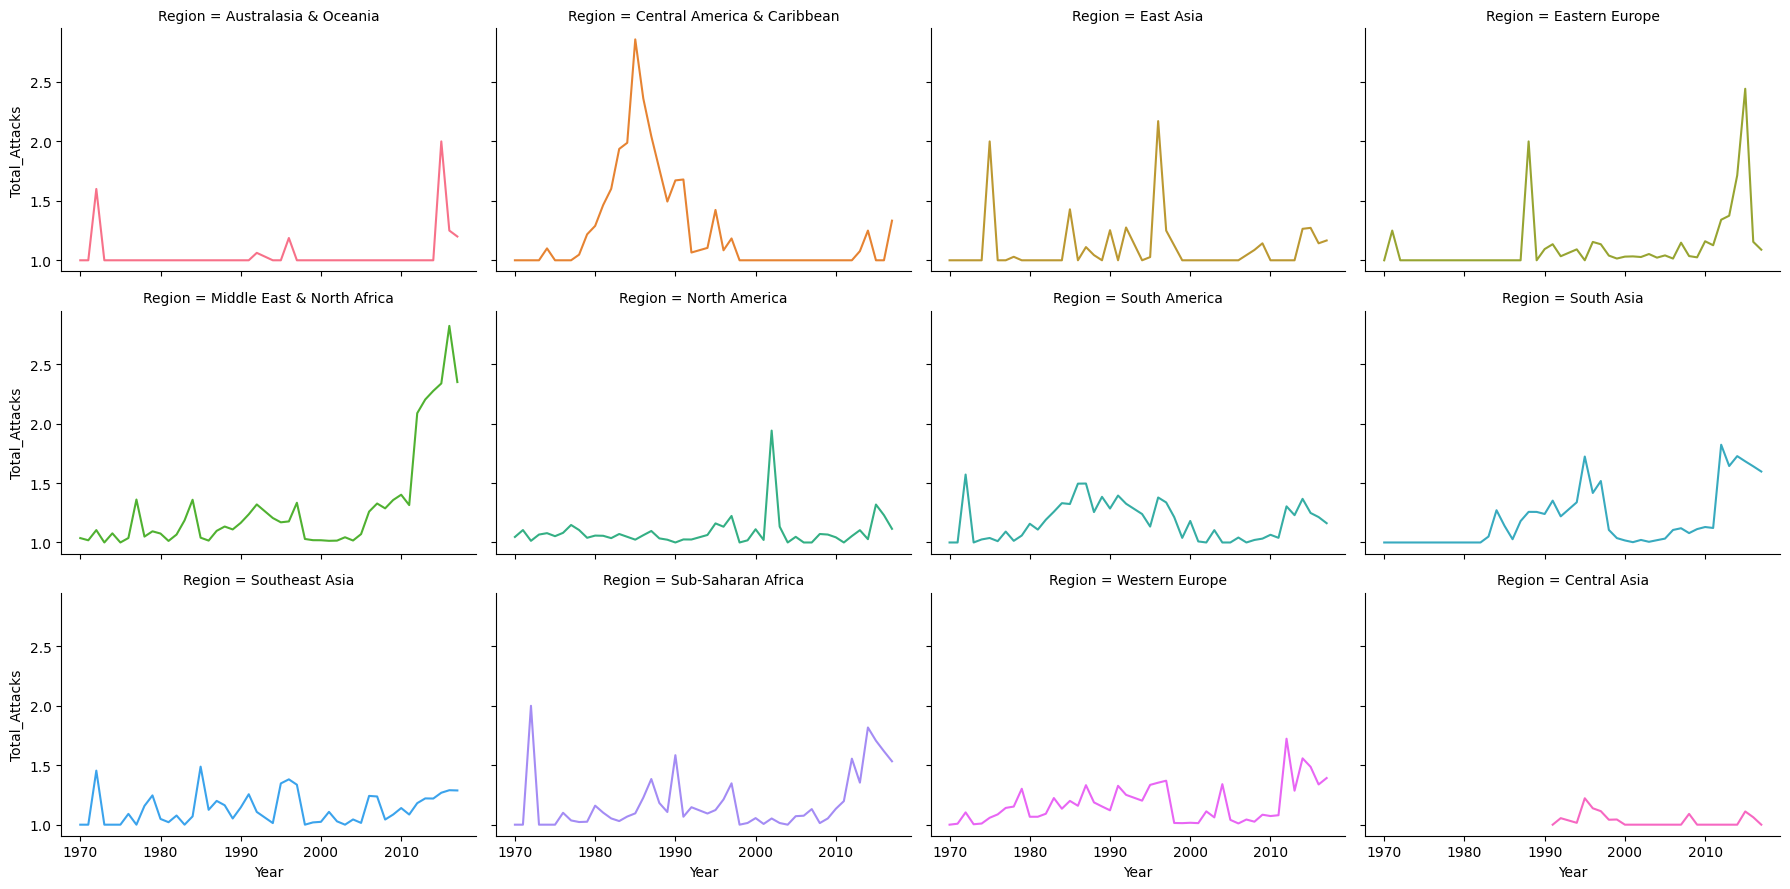

In [24]:
ax = sns.relplot(col="Region", y="Total_Attacks",col_wrap=4, hue='Region',x="Year",kind='line', errorbar=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)

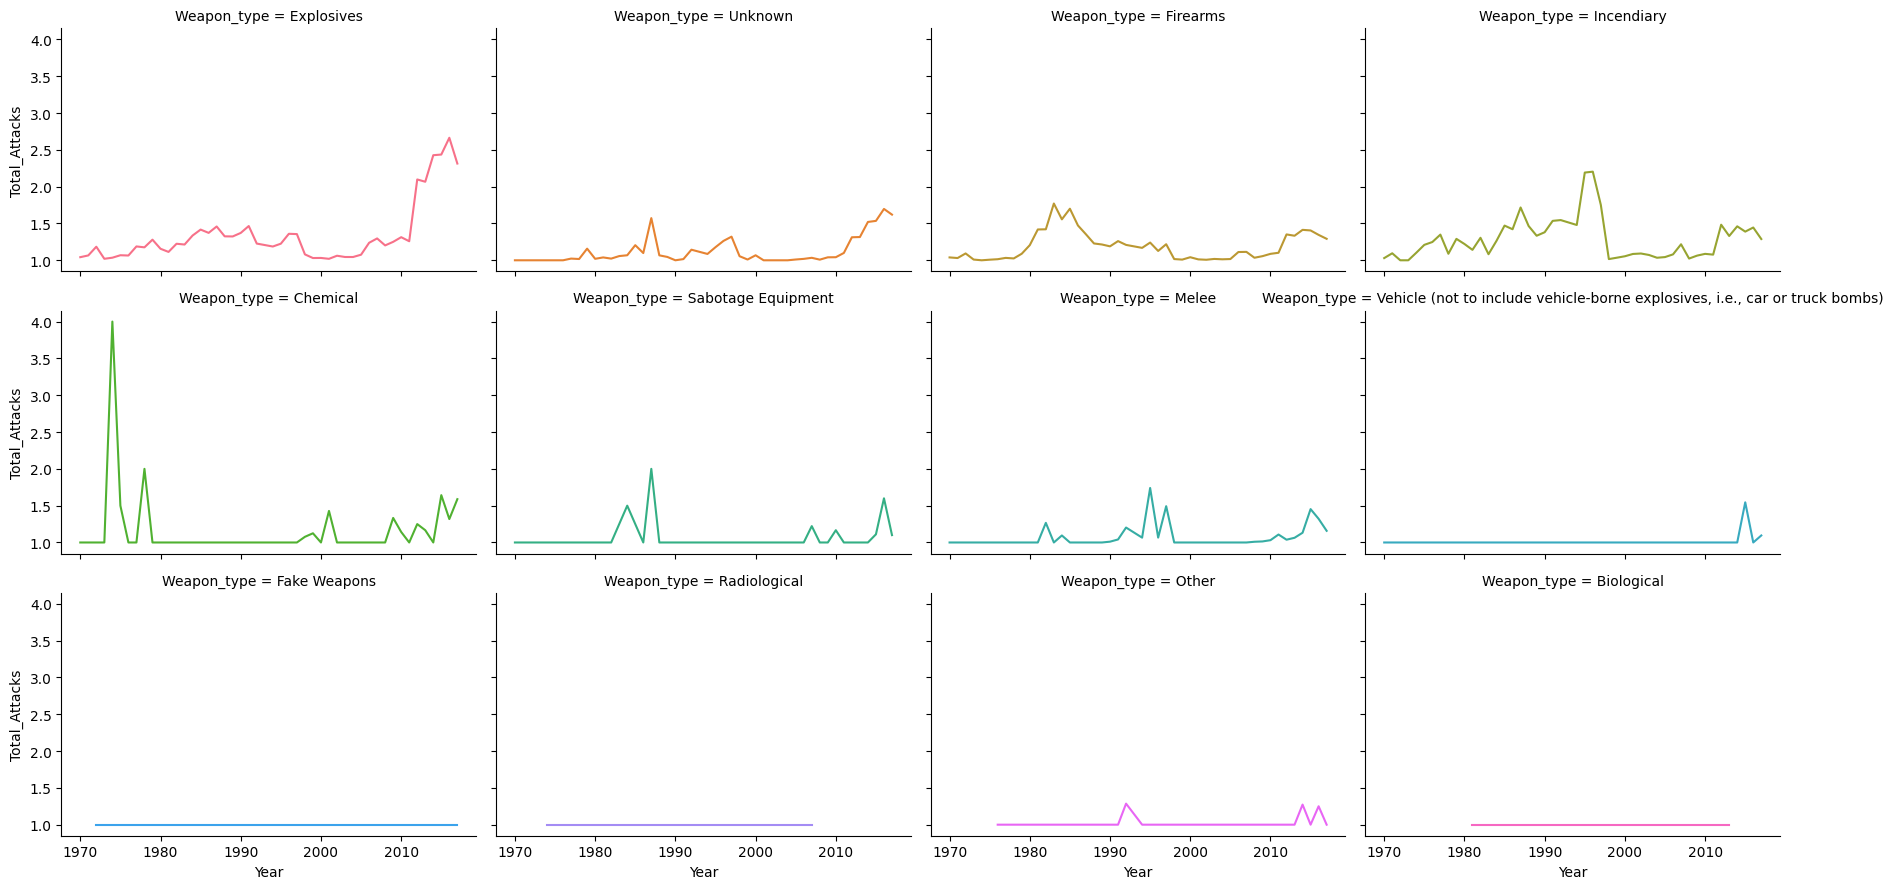

In [23]:
ax = sns.relplot(col="Weapon_type", y="Total_Attacks",col_wrap=4, hue='Weapon_type',x="Year",kind='line', errorbar=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)

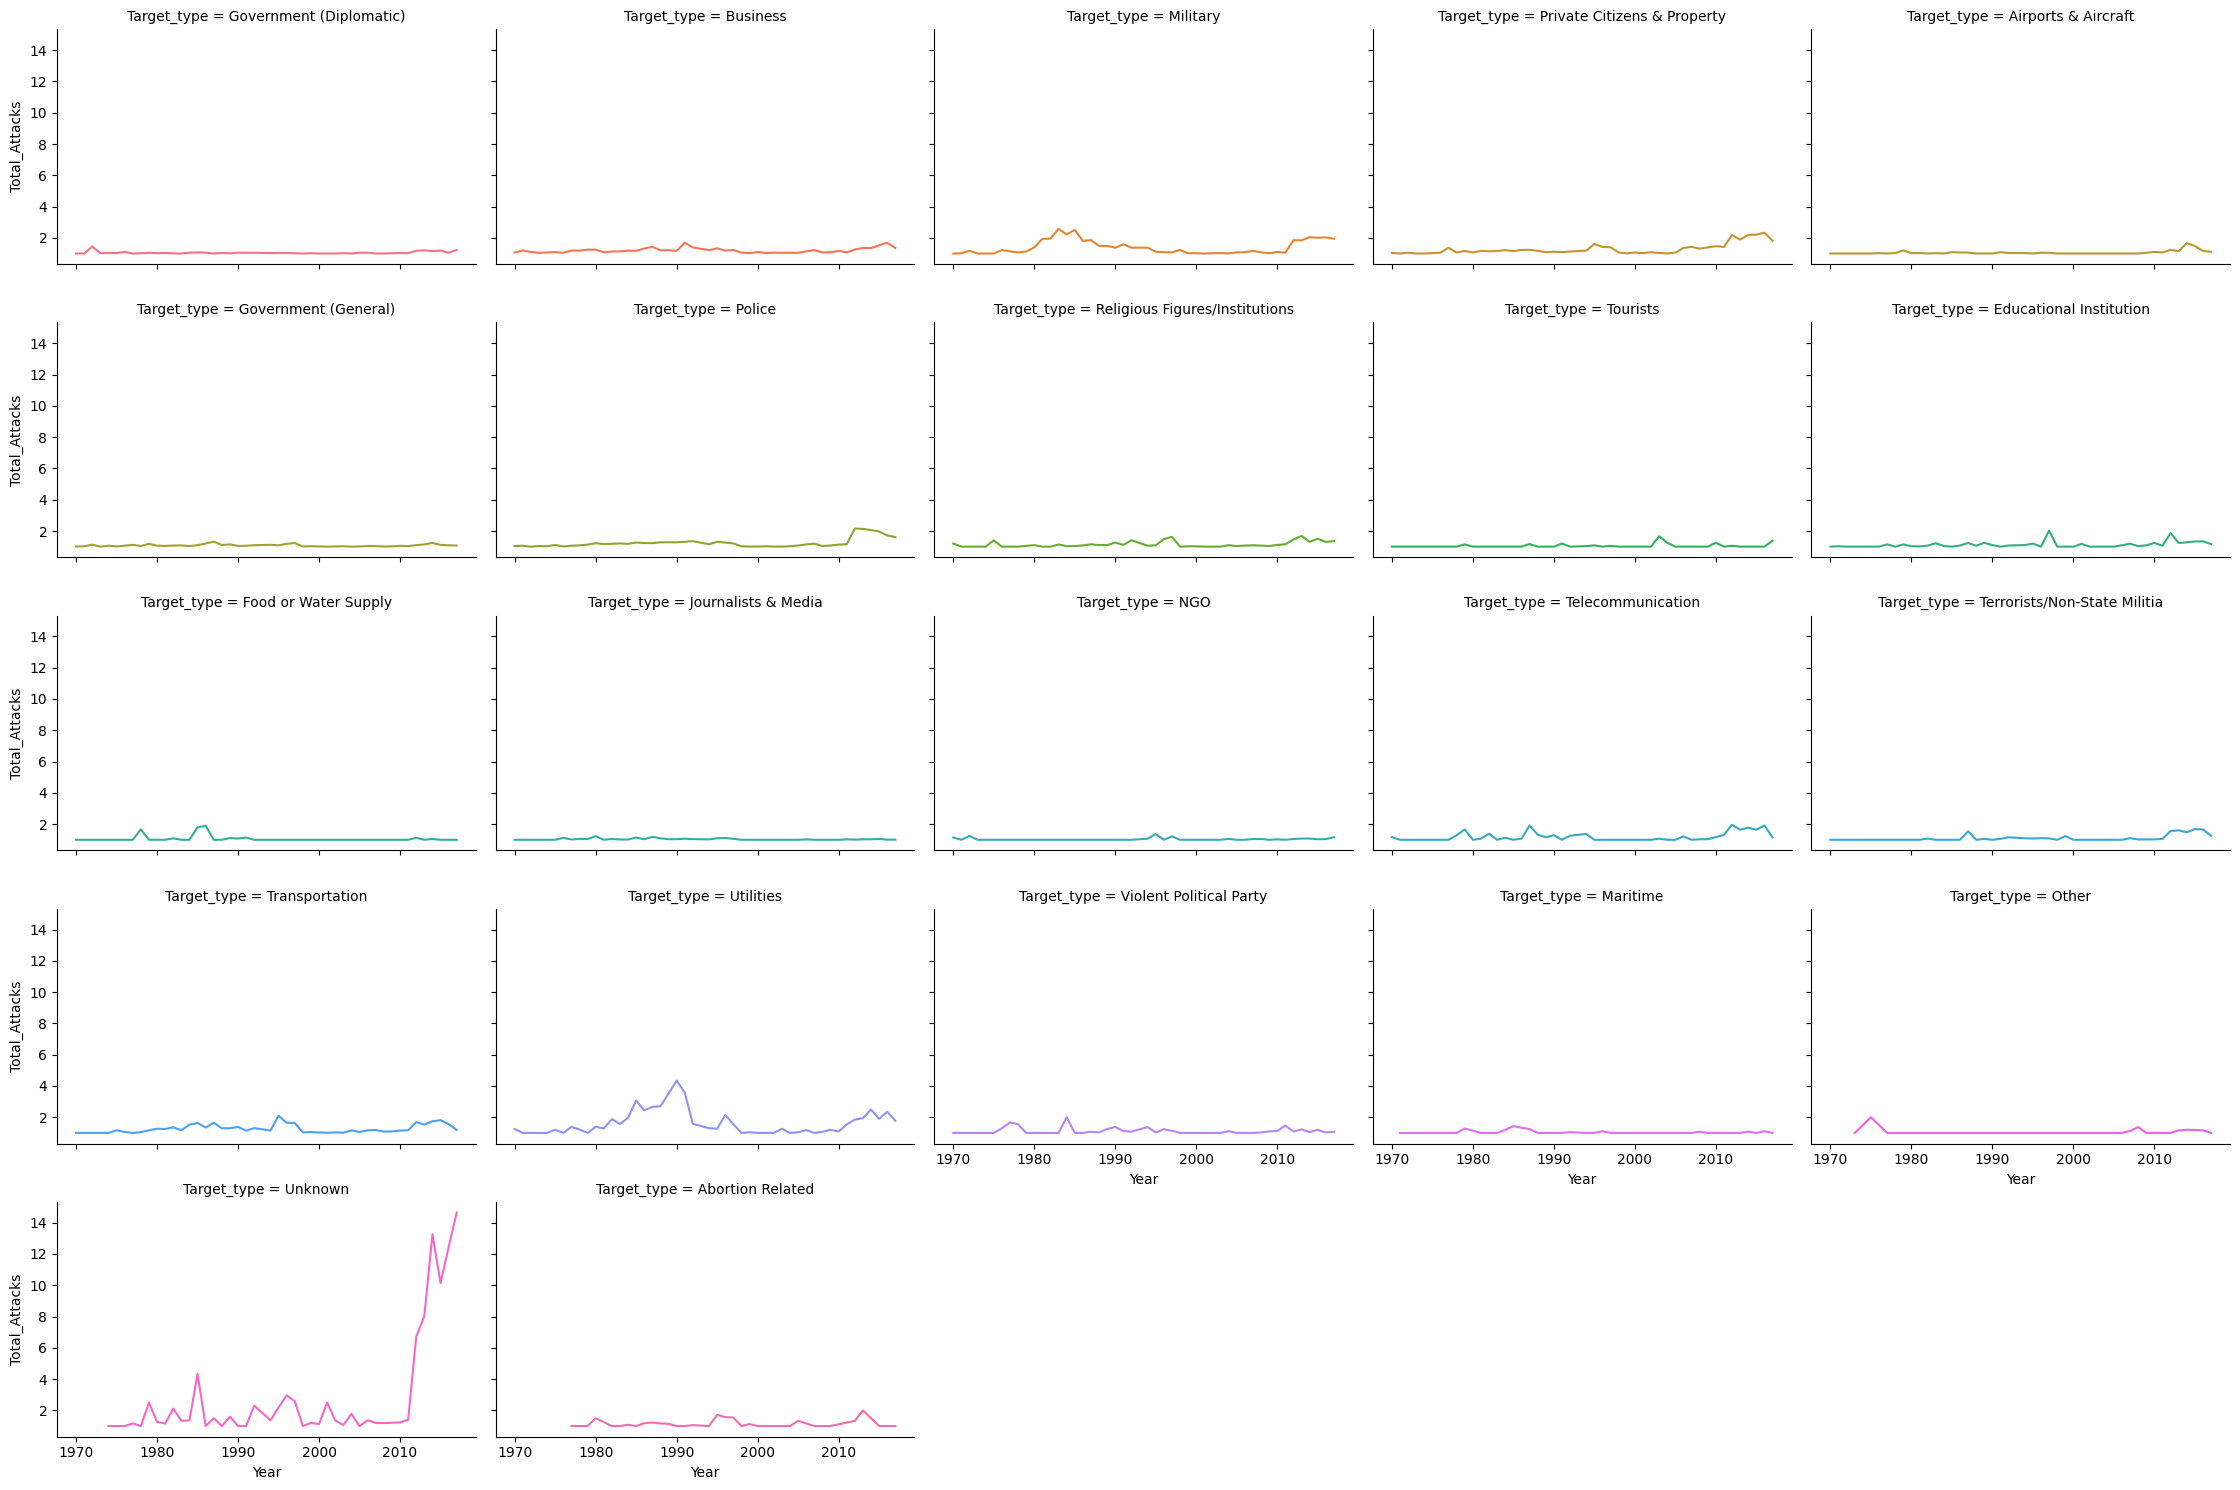

In [28]:
ax = sns.relplot(col="Target_type", y="Total_Attacks",col_wrap=5, hue='Target_type',x="Year",kind='line', errorbar=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)

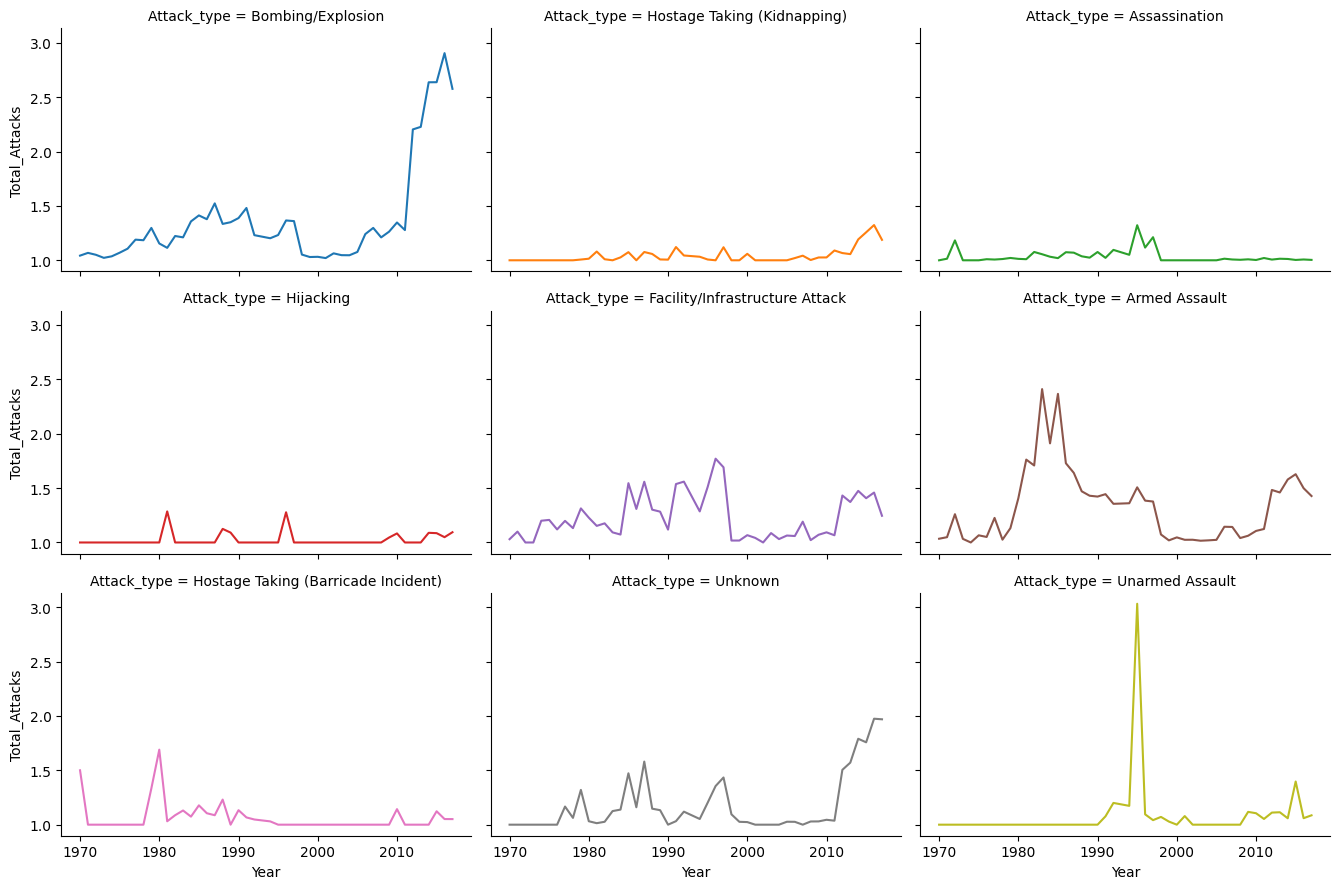

In [26]:
ax = sns.relplot(col="Attack_type", y="Total_Attacks",col_wrap=3, hue='Attack_type',x="Year",kind='line', errorbar=None ,data=attack_per_year, height=3, aspect=1.5, legend=False)